In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


sc.logging.print_header()

adata = sc.read_h5ad('0815newlabel.h5ad')###after re-annotation

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [4]:
adata

AnnData object with n_obs × n_vars = 165813 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'n

In [4]:
# Compute UMAP
sc.tl.umap(adata)

# The UMAP coordinates will be stored in adata.obsm['X_umap']

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


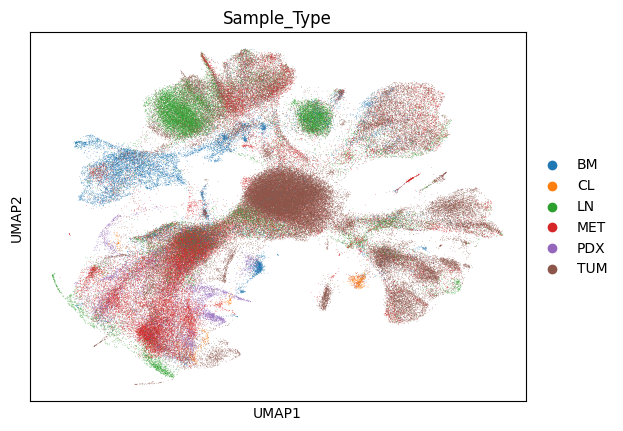

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


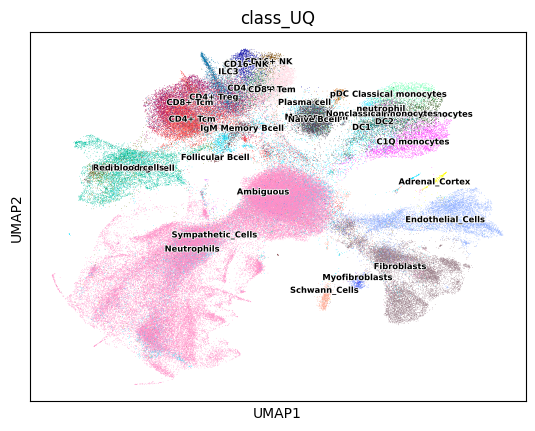

In [7]:
# Now you can plot using the umap() function:
sc.pl.umap(adata, color=['Sample_Type'])
sc.pl.umap(adata, color=['class_UQ'], legend_fontsize="6", legend_fontoutline=1, legend_loc='on data')


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


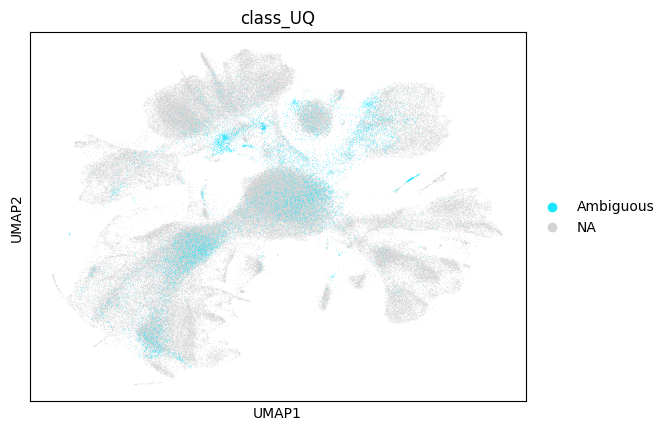

In [8]:
sc.pl.umap(adata, color=['class_UQ'], groups = "Ambiguous")

In [9]:
adata.obs.class_UQ.cat.categories

Index(['Adrenal_Cortex', 'Ambiguous', 'C1Q monocytes', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ Treg', 'CD8+ Tcm', 'CD8+ Tem', 'CD16+ NK', 'CD16- NK',
       'Classical monocytes', 'DC1', 'DC2', 'Endothelial_Cells', 'Fibroblasts',
       'Follicular Bcell', 'ILC3', 'IgM Memory Bcell',
       'Intermediate monocytes', 'Memory Bcell', 'Myofibroblasts',
       'Naive Bcell', 'Neutrophils', 'Nonclassical monocytes', 'Plasma cell',
       'Proliferating Tcell', 'Red blood cells', 'Schwann_Cells',
       'Sympathetic_Cells', 'neutrophil', 'pDC'],
      dtype='object')

# subsetting unknown fibroblast cells for further annotation

In [7]:
##edata for all kinds of fibroblast cells
fdata=adata[(adata.obs['class_UQ'].isin(['Fibroblasts','Myofibroblasts']))].copy()
fdata

AnnData object with n_obs × n_vars = 12314 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nF

In [10]:
np.max(fdata.X)

8.102597

In [11]:
np.min(fdata.X)

0.0

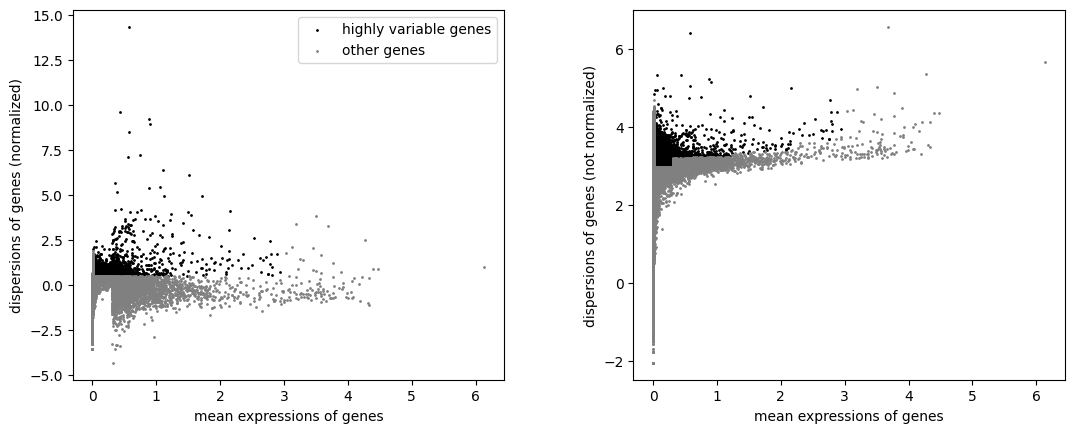

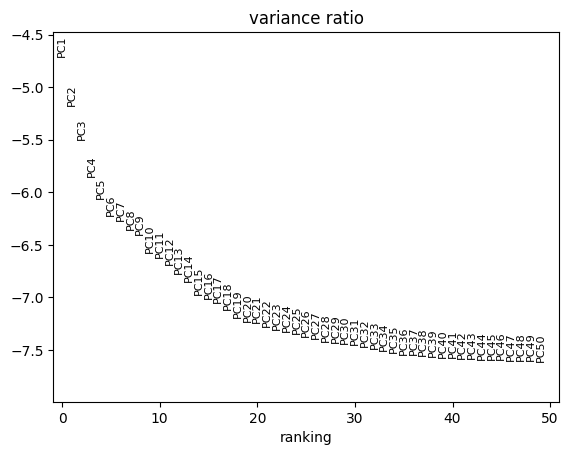

2023-08-08 14:31:38,602 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-08 14:31:45,000 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-08 14:31:45,051 - harmonypy - INFO - Iteration 1 of 10
2023-08-08 14:31:47,631 - harmonypy - INFO - Iteration 2 of 10
2023-08-08 14:31:50,505 - harmonypy - INFO - Iteration 3 of 10
2023-08-08 14:31:53,670 - harmonypy - INFO - Iteration 4 of 10
2023-08-08 14:31:56,173 - harmonypy - INFO - Iteration 5 of 10
2023-08-08 14:31:58,013 - harmonypy - INFO - Iteration 6 of 10
2023-08-08 14:32:01,090 - harmonypy - INFO - Iteration 7 of 10
2023-08-08 14:32:03,675 - harmonypy - INFO - Converged after 7 iterations


In [12]:
try:
    fdata.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata)
fdata.raw = fdata
fdata = fdata[:, fdata.var.highly_variable]
sc.pp.regress_out(fdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata, max_value=10)
sc.tl.pca(fdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata, key="Sample_ID")
sc.pp.neighbors(fdata,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata, min_dist = 0.3)

In [13]:
np.max(fdata.X)

10.0

In [14]:
np.min(fdata.X)

-5.5476055

In [15]:
fdata.write('fibroblasts_reannot_subset01.h5ad', compression = 'gzip')

In [5]:
fdata = sc.read_h5ad('fibroblasts_reannot_subset01.h5ad')

In [6]:
fdata

AnnData object with n_obs × n_vars = 12314 × 7568
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFe

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


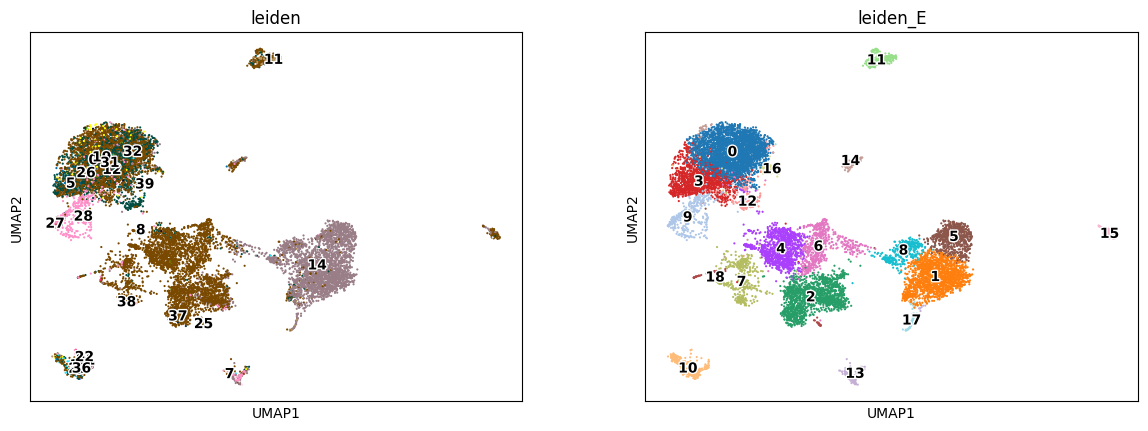

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


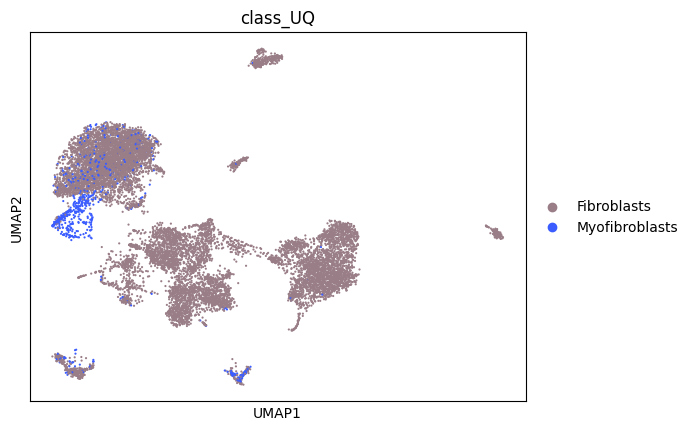

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


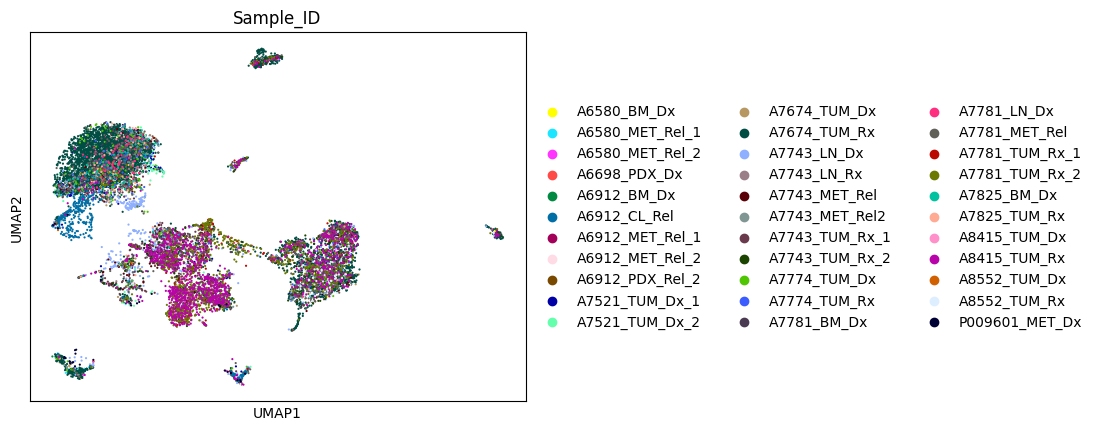

In [10]:
sc.tl.leiden(fdata, key_added = "leiden_E")
sc.pl.umap(fdata, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata, color=['class_UQ'])
sc.pl.umap(fdata, color=['Sample_ID'])

In [11]:
sc.tl.rank_genes_groups(fdata,groupby='leiden_E', method='wilcoxon')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


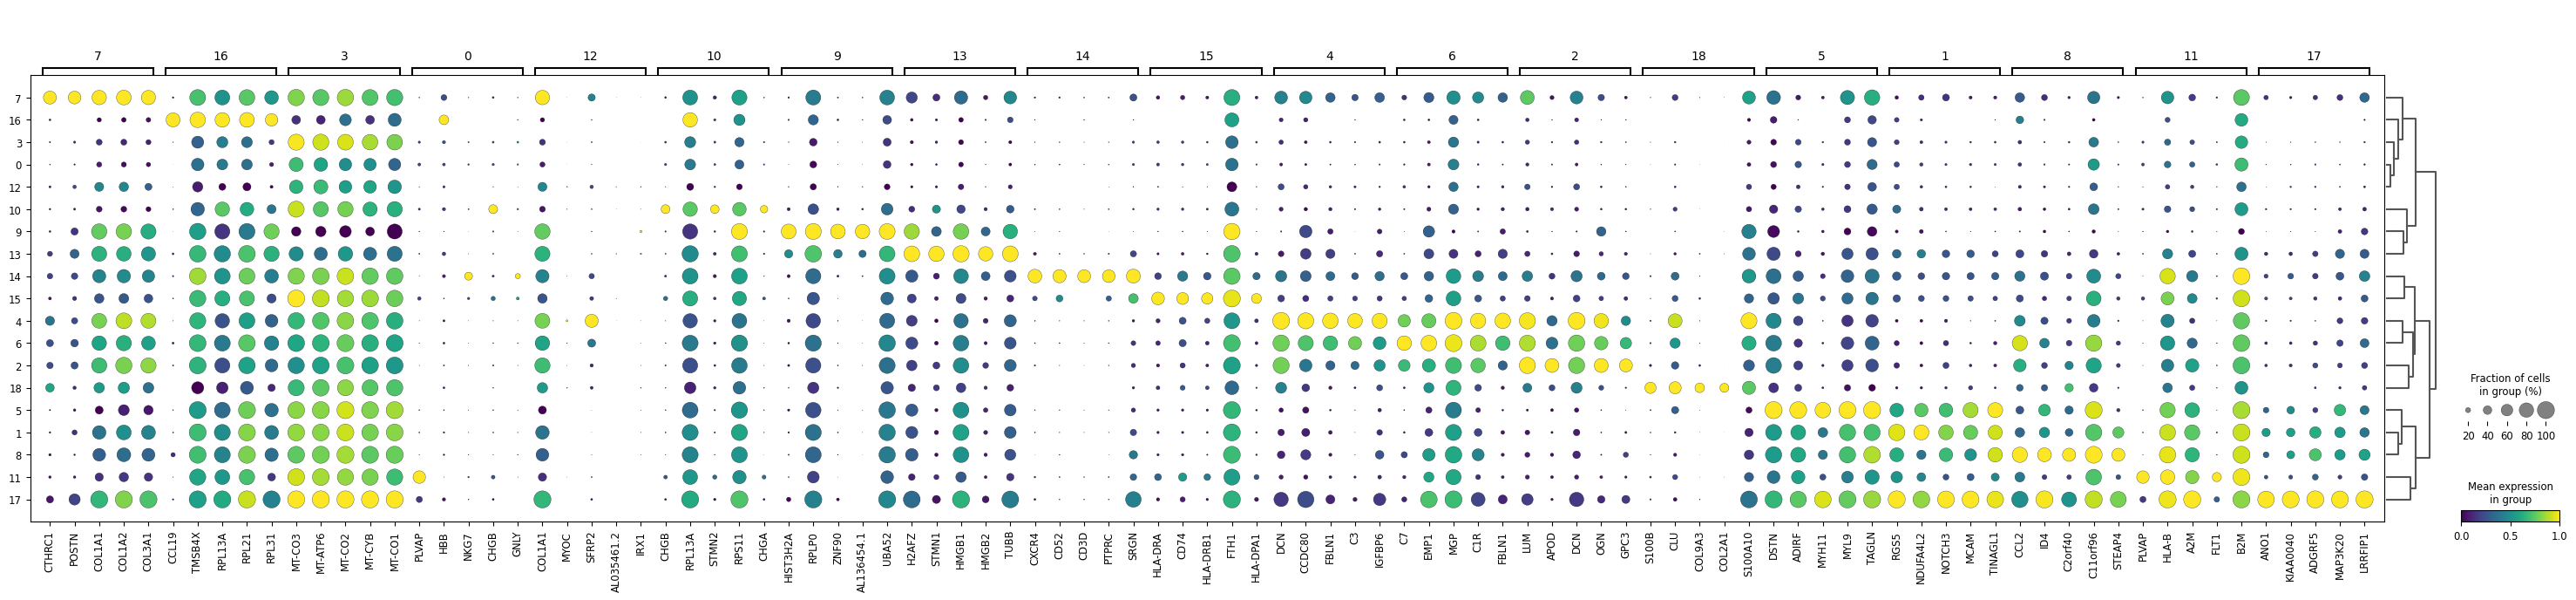

In [12]:
sc.pl.rank_genes_groups_dotplot(fdata,n_genes=5,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

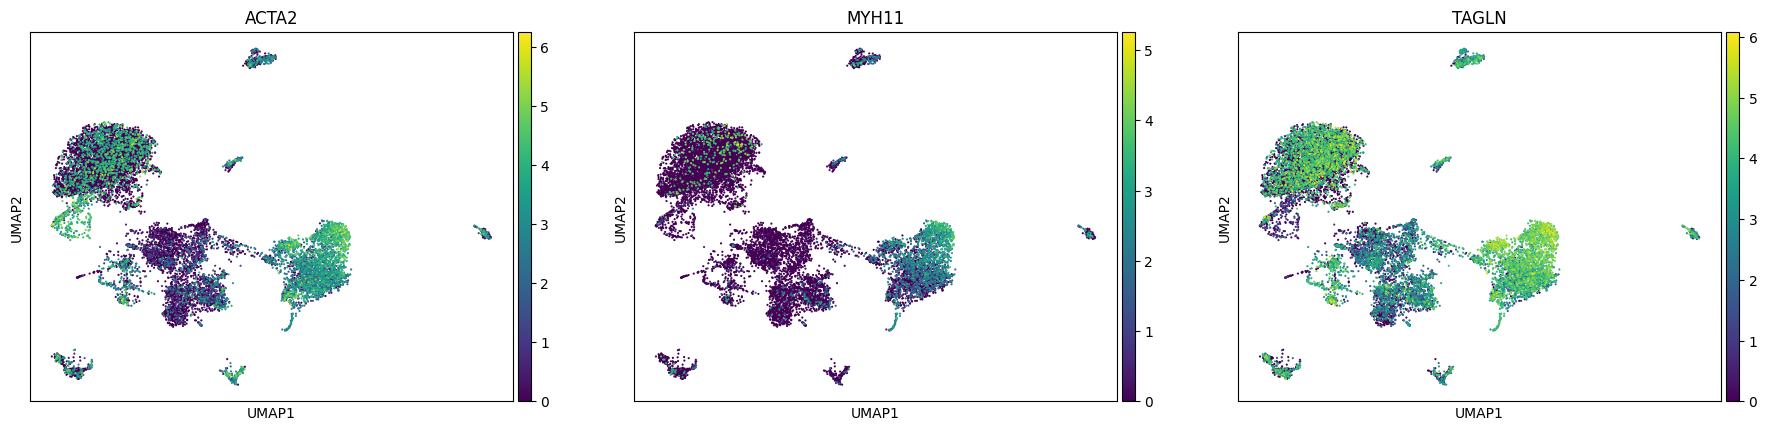

In [13]:
sc.pl.umap(fdata,color=['ACTA2','MYH11','TAGLN'])

In [ ]:
# AMBIGUOUS clusters: 10, 17, 11, 19
# Cluster16 - potentially proliferating cells? ambiguous group - contains non-histone chromosomal high mobility group protein

#
#
# - iCAFs (AMBIGIOUS - ADGRF5: Predicted to act upstream of or within several processes, including glomerular filtration; pharyngeal arch artery morphogenesis; and surfactant homeostasis. Located in cell surface and cytoplasmic vesicle; potentially epithelial;
#### 
## HSPs - all heat shock proteins


#20 - AMBIGUOUS - Glial cells-> CDH19: marker for glioblastoma stem-like cells; CRYAB: involved in reactive astrogliosis in traumatic brain injuries; S100B: peripheral blood brain barrier marker, glial-specific, expressed primarily by astrocytes
#19 - AMBIGUOUS - BRD4: nonspecific; LRRFIP1: prognostic biomarker of glioma; LOXL2: <- same as LRRFIP1; ANO1: GIT associated; KIAA0040: Syncytiotrophoblasts, Skeletal myocytes

#18 - rCAFs - CCL19; TMSB4X - regeneration, tissue repair; + ribosomal markers
#17 - AMBIGUOUS - T cell
#16 - antigen-presenting CAFs (apCAFs)
#15 - Proliferating Endothelial
#14 - mCAFS - COL1A2 and

#13 - mCAFs
#12 - Tumor-like CAFs (tCAFS)

#11 - AMBIGUOUS/endothelial
#10 - AMBIGUOUS - Enteroendocrine? - CHGB- tyrosine-sulfated secretory protein abundant in peptidergic endocrine cells and neurons; CHGA - found in secretory vesicles of neurons and endocrine cells; STMN2 - neuronal growth and osteogenesis
#9 - vCAFs

#8 - AMBIGUOUS - ribosomal protein, dna binding trans factor
#7 - iCAFs
#6 - vCAFs

#Endometrial ;TMSB10 - Non-specific - Mixed function (mainly); LGALS1; S100A11: endometrial
#MGP - Reticular Fibroblasts? https://www.sciencedirect.com/science/article/pii/S0022202X15355226

#5 - mCAFs
#4 - matrix CAFs (mCAFs)  but also potentially iCAFs
#3 - inflammatory CAFs (iCAFs) 
#2 - AMBIGUOUS - MT genes 
#1 - Pericytes
#0 - AMBIGUOUS because contaminated with NK genes and ribosomal genes

In [18]:
pd.DataFrame(fdata.uns['rank_genes_groups']['names']).head(10)

0         1         2        3        4      5       6       7   
0    B2M      RGS5       LUM   MT-CO3      DCN   DSTN      C7  CTHRC1  \
1   TPT1  NDUFA4L2      APOD  MT-ATP6   CCDC80  ADIRF    EMP1   POSTN   
2  RPL13    NOTCH3       DCN   MT-CO2    FBLN1  MYH11     MGP  COL1A1   
3   RPS2      MCAM       OGN   MT-CYB       C3   MYL9     C1R  COL1A2   
4  RPS3A   TINAGL1      GPC3   MT-CO1   IGFBP6  TAGLN   FBLN1  COL3A1   
5   RPL3     MEF2C     ABCA8   MT-ND1  S100A10  ACTA2     DCN     FAP   
6  RPL10   COL18A1       CFH   MT-ND3     CST3   TPM2    CCL2     FN1   
7  RPS14    COL4A2  SERPINF1   MT-ND4      GSN   SOD3  CCDC80    VCAN   
8  RPS18    PDGFRB       C1S   MT-ND2      C1R  MGST3   IL1R1  LGALS1   
9  RPL32   CHCHD10     LTBP4    RPS18      CFD    PLN  NFKBIA     BGN   

          8           9      10       11          12      13        14   
0      CCL2    HIST3H2A    CHGB    PLVAP         VIM   H2AFZ     CXCR4  \
1       ID4       RPLP0  RPL13A    HLA-B     MT-ATP6   STMN1      CD52   
2   C2orf40       ZNF90   STMN2      A2M      MT-CO1   HMGB1      CD3D   
3  C11orf96  AL136454.1   RPS11     FLT1      MT-CYB   HMGB2     PTPRC   
4    STEAP4       UBA52    CHGA      B2M      COL1A1    TUBB      SRGN   
5     TAGLN     SLC25A4  TUBB2B    HSPG2      COL1A2  LGALS1   TNFAIP3   
6    ARID5B      S100A6   RPS18    HLA-A        MYOC    CKS2      CREM   
7     TIMP3       RPS20    RPSA  SPARCL1       SFRP2    TYMS       CD2   
8   TINAGL1       UQCC2   RPS24    HLA-C  AL035461.2   PTTG1      CD3E   
9      CD59      COMMD1  MT-CO3     STC1        IRX1  RANBP1  LEPROTL1   

         15      16        17       18  
0   HLA-DRA   CCL19      ANO1    S100B  
1      CD74  TMSB4X  KIAA0040      CLU  
2  HLA-DRB1  RPL13A    ADGRF5   COL9A3  
3      FTH1   RPL21   MAP3K20   COL2A1  
4  HLA-DPA1   RPL31   LRRFIP1  S100A10  
5       LYZ    RPS8      BRD4  COL11A1  
6    LAPTM5  RPS15A    ANGPT2   FGFBP2  
7      SRGN  RPL10A     MYO1B     COMP  
8  HLA-DQB1   RPLP1  SLC39A14    SNORC  
9    MT-CO3     HBB     ASAP2      FN1

In [14]:
cellmarker_dict={'T cell':['CD3D','CD44'],
'NK':['NCAM1','NCR1'], 
'Endothelial':['PECAM1','IGFBP2','LY6E'],
'Lymphatic endothelial':['CCL21','PDPN','LYVE1'],
'Proliferating Endothelial':['MKI67','STMN1'],
'Venous endothelial':['LEFTY1','EPHB4'],
'Arterial endothelial':['CXCL12','EPHB2'],
'Fibroblasts':['VIM','LUM','COL1A1'],
'Myofibroblasts':['MYH9','MYH10','MYH11','ACTA2','CALD1','TAGLN'],                 
                 }


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


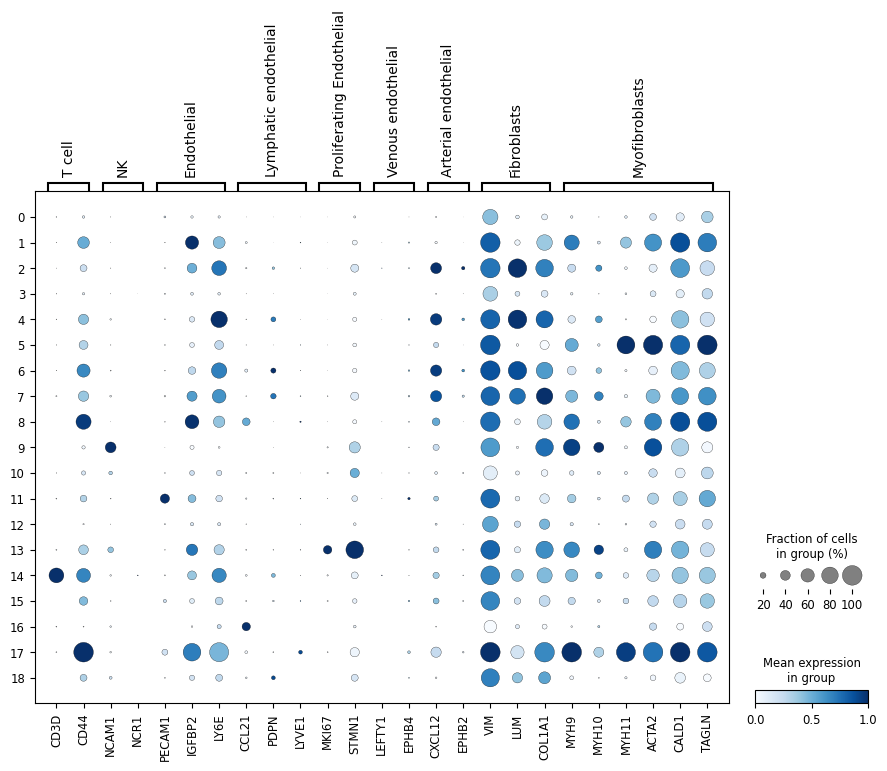

In [15]:
sc.pl.dotplot(fdata, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [19]:
#To map the identified clusters to a cell type annotation label

fibroannot= {
    '0':'Ambiguous',
    '1':'Pericytes',
    '2':'Inflammatory CAFs',
    '3':'Ambiguous',
    '4':'Inflammatory CAFs',
    '5':'Vascular CAFs',
    '6':'Inflammatory CAFs',
    '7':'Matrix CAFs',
    '8':'Capillary Endothelial',
    '9':'Ambiguous',
    '10':'Chromaffin Cells',
    '11':'Ambiguous',
    '12':'Vascular CAFs',
    '13':'Ambiguous',
    '14':'T cells',
    '15':'Antigen-Presenting CAFs',
    '16':'Reticular CAFs',
    '17':'Tumor-like CAFs',
    '18':'Matrix CAFs',
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata.obs['cell type'] = fdata.obs['leiden_E'].map(fibroannot).astype('category')



/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


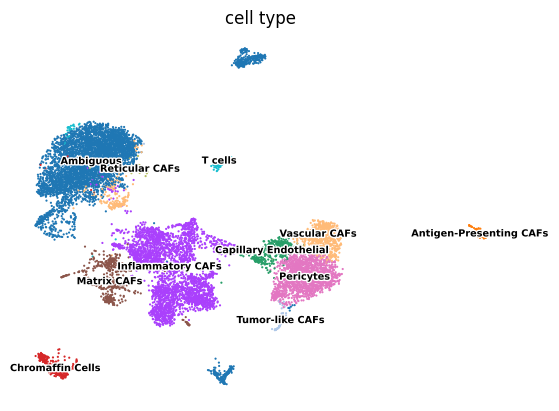

In [20]:
sc.pl.umap(fdata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


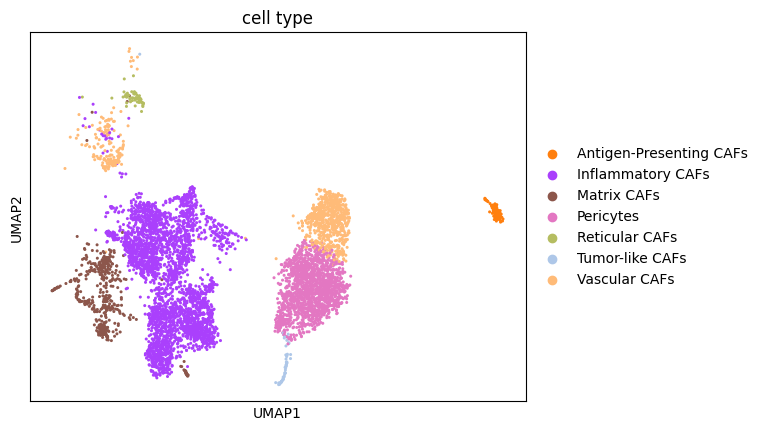

In [21]:
fdata2=fdata[fdata.obs['cell type'].isin(['Pericytes','Matrix CAFs','Reticular CAFs','Inflammatory CAFs','Antigen-Presenting CAFs','Tumor-like CAFs','Vascular CAFs'])].copy()
sc.pl.umap(fdata2,color='cell type')

In [22]:
fdata2.write('fibroblasts_reannot_subset02.h5ad')

In [12]:
fdata2 = sc.read_h5ad('fibroblasts_subset02.h5ad') #run this if reimporting

In [14]:
fdata2

AnnData object with n_obs × n_vars = 6382 × 7568
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

In [24]:
fdata2 = fdata2.raw.to_adata()

In [25]:
np.max(fdata2.X)

8.102597

In [26]:
np.min(fdata2.X)

0.0

# Repeat everything from the start to clean up the fibroblast clusters (2nd iteration)

In [27]:
sc.tl.umap(fdata2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


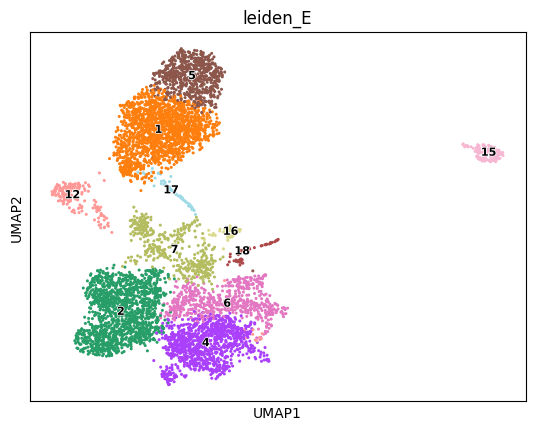

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


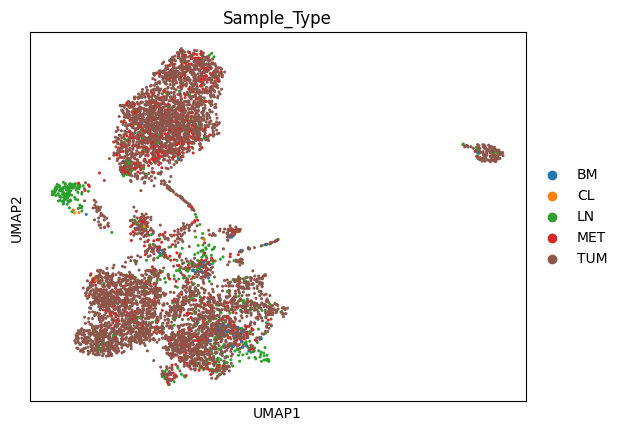

In [28]:
sc.pl.umap(fdata2, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata2, color=['Sample_Type'])

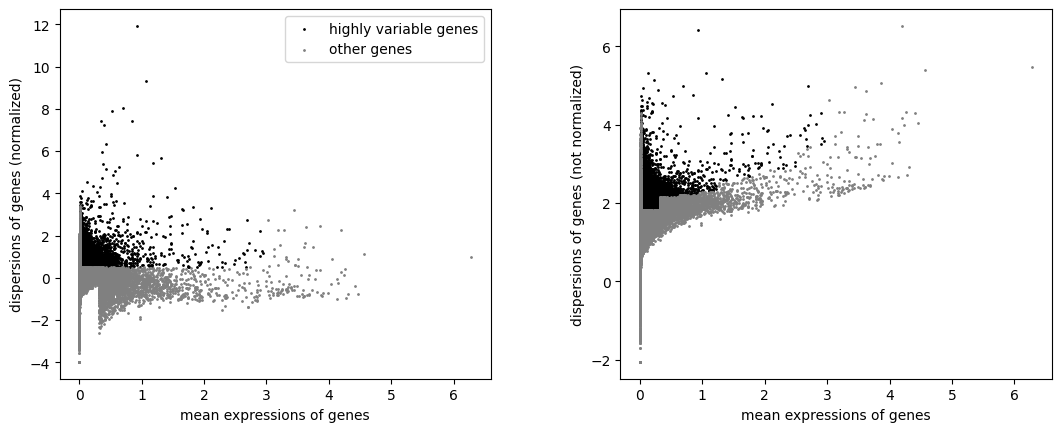

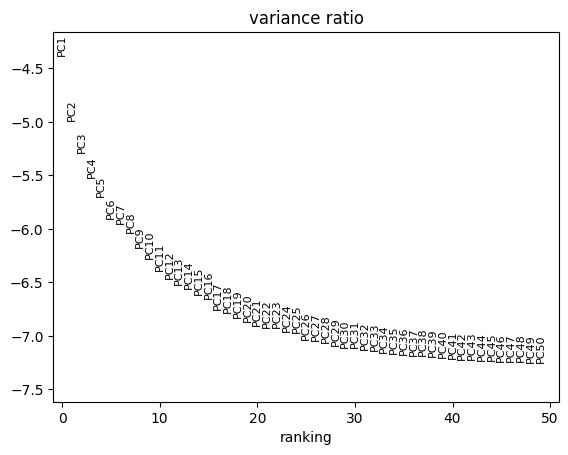

2023-08-15 16:22:07,416 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-15 16:22:11,745 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-15 16:22:11,765 - harmonypy - INFO - Iteration 1 of 10
2023-08-15 16:22:14,040 - harmonypy - INFO - Iteration 2 of 10
2023-08-15 16:22:15,936 - harmonypy - INFO - Iteration 3 of 10
2023-08-15 16:22:17,673 - harmonypy - INFO - Iteration 4 of 10
2023-08-15 16:22:19,173 - harmonypy - INFO - Iteration 5 of 10
2023-08-15 16:22:20,487 - harmonypy - INFO - Iteration 6 of 10
2023-08-15 16:22:21,489 - harmonypy - INFO - Iteration 7 of 10
2023-08-15 16:22:22,746 - harmonypy - INFO - Iteration 8 of 10
2023-08-15 16:22:23,538 - harmonypy - INFO - Iteration 9 of 10
2023-08-15 16:22:24,374 - harmonypy - INFO - Iteration 10 of 10
2023-08-15 16:22:25,335 - harmonypy - INFO - Stopped before convergence


In [29]:
try:
    fdata2.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata2)
fdata2.raw = fdata2
fdata2 = fdata2[:, fdata2.var.highly_variable]
sc.pp.regress_out(fdata2, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata2, max_value=10)
sc.tl.pca(fdata2, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata2, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata2, key="Sample_ID")
sc.pp.neighbors(fdata2,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata2, min_dist = 0.3)

In [30]:
fdata2.write('fibroblasts_reannot_subset02_postscale.h5ad')

In [7]:
fdata2 = sc.read_h5ad('fibroblasts_subset02_postscale.h5ad')###(prior steps do not need to be run after importing this re-annotated labels)

In [8]:
fdata2

AnnData object with n_obs × n_vars = 6382 × 5243
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


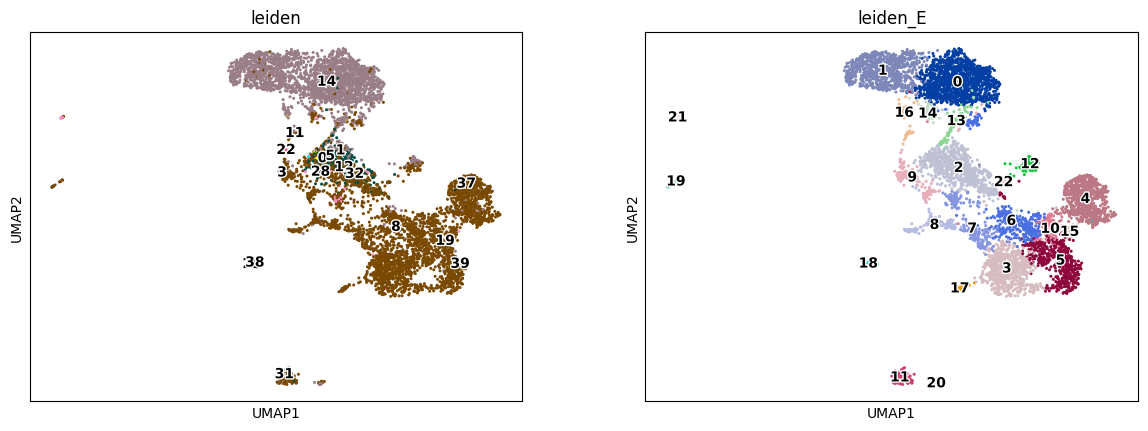

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


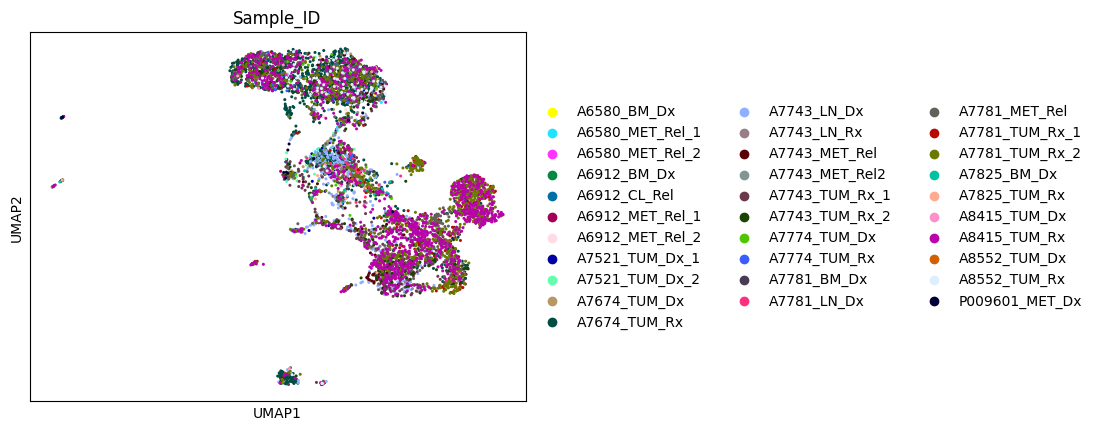

In [31]:
sc.tl.leiden(fdata2, key_added = "leiden_E")
sc.pl.umap(fdata2, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata2, color=['Sample_ID'])

In [32]:
fdata2.write('fibro_reannot_subset02.h5ad')

In [33]:
sc.tl.rank_genes_groups(fdata2,groupby='leiden_E', method='wilcoxon')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:

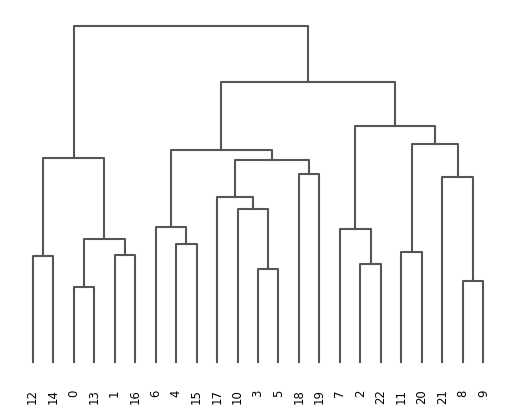

<Axes: >

In [34]:
sc.tl.dendrogram(fdata2,groupby='leiden_E')
sc.pl.dendrogram(fdata2,groupby='leiden_E')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


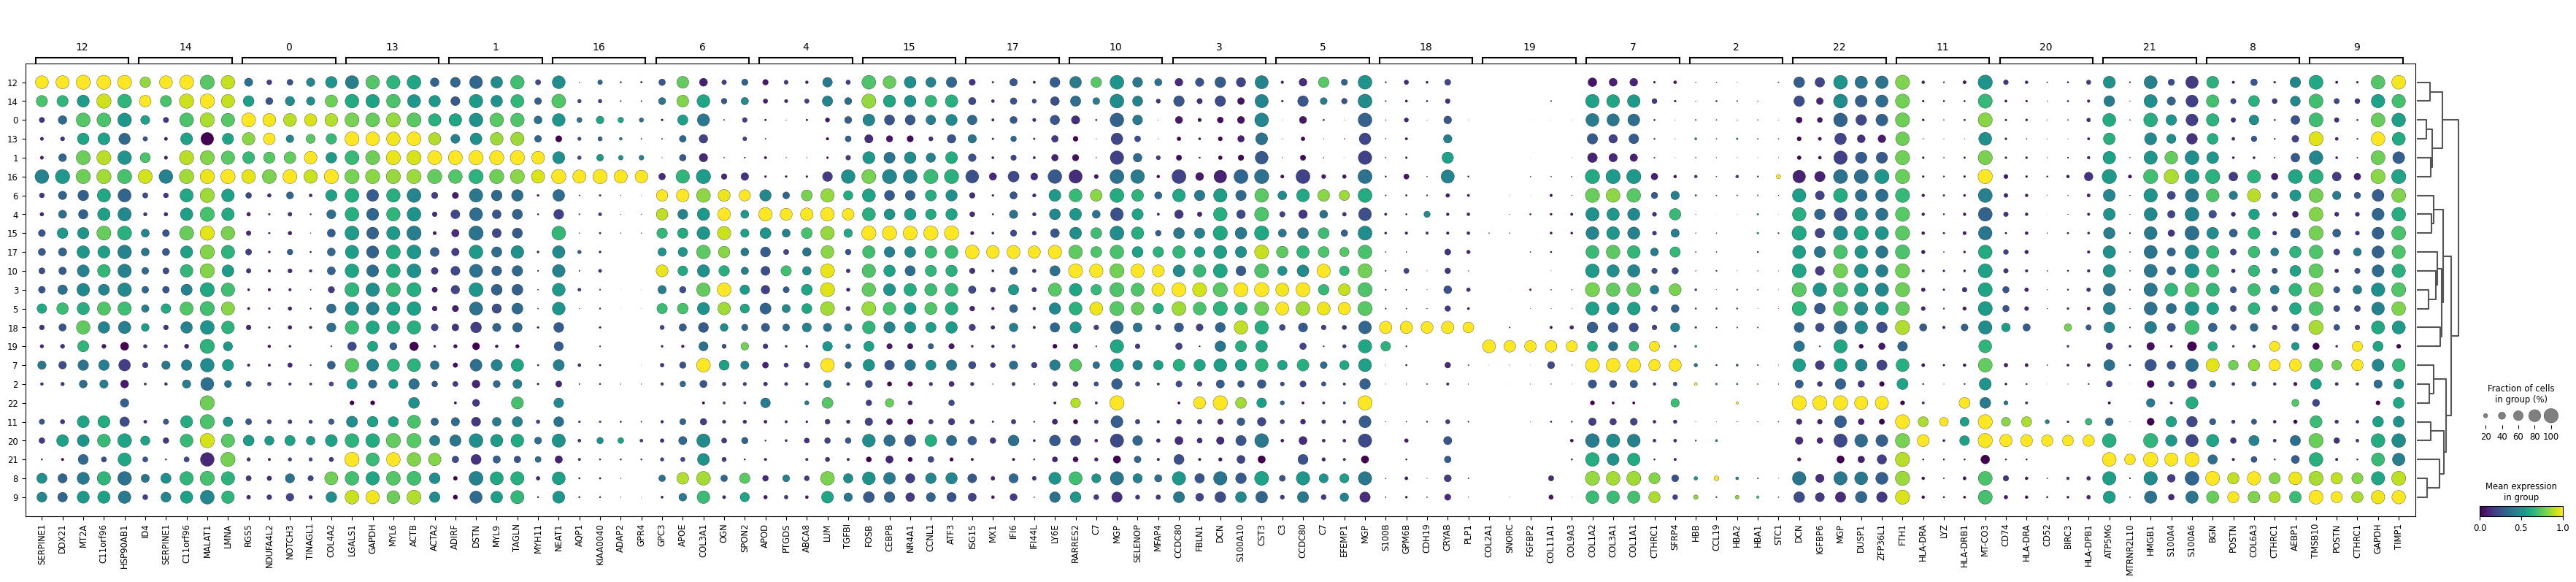

In [35]:
sc.pl.rank_genes_groups_dotplot(fdata2,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


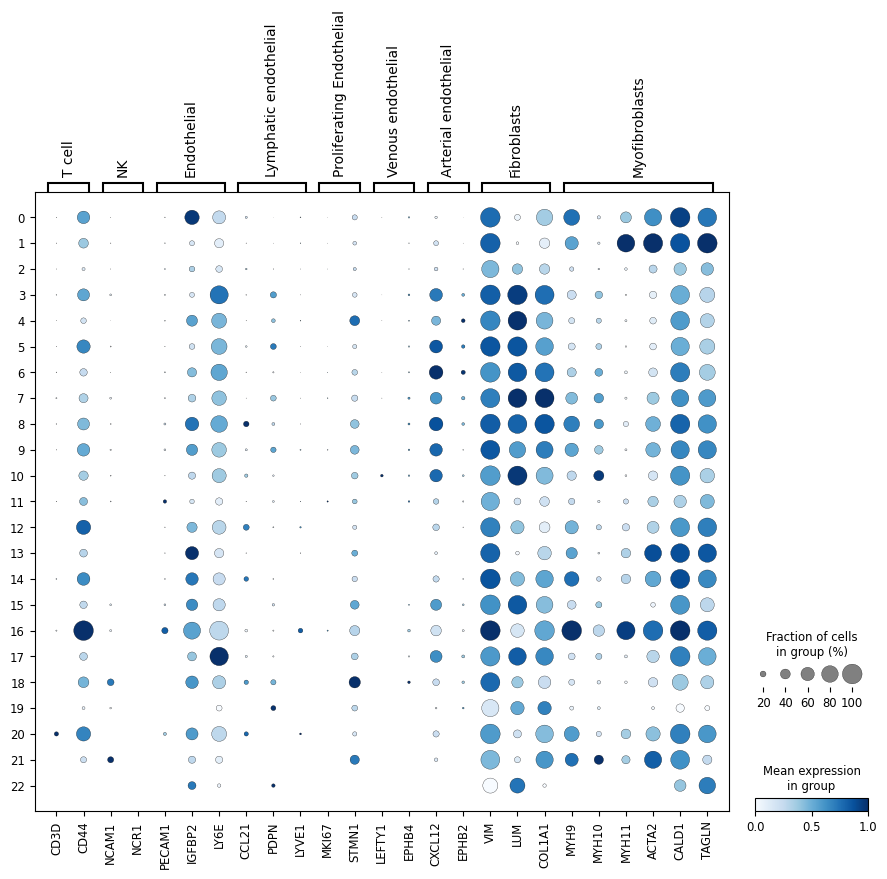

In [36]:
sc.pl.dotplot(fdata2, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [37]:
pd.DataFrame(fdata2.uns['rank_genes_groups']['names']).head(10)

0        1       2        3       4       5       6       7   
0      RGS5    ADIRF   RPL13   CCDC80    APOD      C3    GPC3  COL1A2  \
1  NDUFA4L2     DSTN   RPS18    FBLN1   PTGDS  CCDC80    APOE  COL3A1   
2    NOTCH3     MYL9   RPS3A      DCN   ABCA8      C7  COL3A1  COL1A1   
3   TINAGL1    TAGLN   RPL10  S100A10     LUM  EFEMP1     OGN  CTHRC1   
4    COL4A2    MYH11   RPS14     CST3   TGFBI     MGP   SPON2   SFRP4   
5     MEF2C    ACTA2   RPS12     MMP2   CLDN1   FBLN1      C7    VCAN   
6   COL18A1     TPM2  RPS27A      CFD  CYP1B1     CFD  COL1A2     LUM   
7      MCAM  SPARCL1   RPL19   IGFBP6   THBS4    EMP1     CFH     BGN   
8    PDGFRB     MCAM  RPL18A    FBLN2     OGN     C1R  COL6A3   SPARC   
9      CD36     SOD3    RPS2      GSN   SCN7A    SOD2   TXNIP  COL8A1   

         8        9  ...        13        14        15        16      17   
0      BGN   TMSB10  ...    LGALS1       ID4      FOSB     NEAT1   ISG15  \
1    POSTN    POSTN  ...     GAPDH  SERPINE1     CEBPB      AQP1     MX1   
2   COL6A3   CTHRC1  ...      MYL6  C11orf96     NR4A1  KIAA0040    IFI6   
3   CTHRC1    GAPDH  ...      ACTB    MALAT1     CCNL1     ADAP2  IFI44L   
4    AEBP1    TIMP1  ...     ACTA2      LMNA      ATF3      GPR4    LY6E   
5   COL1A1      FN1  ...  NDUFA4L2    COL4A1      BTG2     CCND1   STAT1   
6     VCAN   LGALS1  ...      MYL9       NCL    DNAJA1      ANO1   IFIT3   
7   COL3A1     FTH1  ...     RPL35      ETS1      MEG3      SNRK     MX2   
8   COL1A2  S100A11  ...     TAGLN     CYTOR     CEBPD    ADGRF5    OAS1   
9  EMILIN1    RPL27  ...      RGS5    PHLDA1  HSP90AA1   LRRFIP1    BST2   

        18       19        20         21        22  
0    S100B   COL2A1      CD74     ATP5MG       DCN  
1    GPM6B    SNORC   HLA-DRA  MTRNR2L10    IGFBP6  
2    CDH19   FGFBP2      CD52      HMGB1       MGP  
3    CRYAB  COL11A1     BIRC3     S100A4     DUSP1  
4     PLP1   COL9A3  HLA-DPB1     S100A6   ZFP36L1  
5    ITGB8     COMP      BTG1     HNRNPM     SFRP2  
6  S100A10   COL9A2  HLA-DPA1    RPL36AL     FBLN1  
7    NRXN1   COL9A1       EZR     LGALS1  HLA-DRB1  
8     VWA1     RBP4      SRGN        ESD     CYR61  
9    ANXA2    S100B      CD37      RPLP0   ALDH1A1  

[10 rows x 23 columns]

In [38]:
# Cluster 5 - heat shock protein, PLAUR and ILR1 - PLAUR encodes the urokinase receptor (uPAR), which promotes cell survival, migration, and resistance to targeted cancer therapeutics in glioblastoma cells in culture and in mouse model systems
# https://www.nature.com/articles/s41598-018-21358-1
#12 - UACA, MALAT1 - cancer associated markers
#15 - PCLAF - promotes prolif of neuroblastoma cells
# hCAFs = Heatshock protein CAFs
# 14 - endothelial
fibroannot2= {
    '0':'Pericytes',
    '1':'mCAFs',
    '2':'Ambiguous',
    '3':'iCAFs',
    '4':'iCAFs',
    '5':'iCAFs',
    '6':'iCAFs',
    '7':'mCAFs',
    '8':'mCAFs',
    '9':'tCAFs',
    '10':'iCAFs',
    '11':'apCAFs',
    '12':'hCAFs',
    '13':'vCAFs',
    '14':'Ambiguous',
    '15':'iCAFs',
    '16':'Ambiguous',
    '17':'Ambiguous',
    '18':'Ambiguous',
    '19':'mCAFs',
    '20':'apCAFs',
    '21':'Ambiguous',
    '22':'iCAFs',

}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata2.obs['cell type'] = fdata2.obs['leiden_E'].map(fibroannot2).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


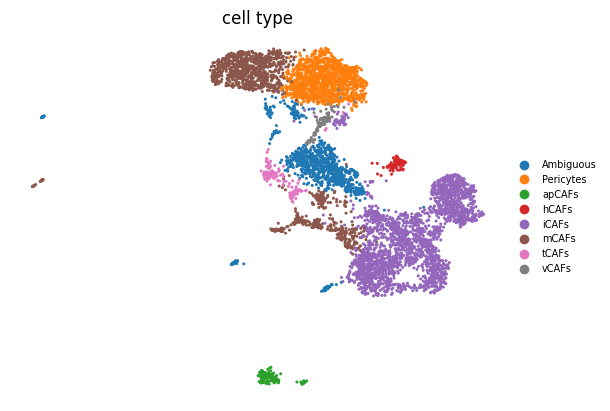

In [39]:
sc.pl.umap(fdata2, color='cell type',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


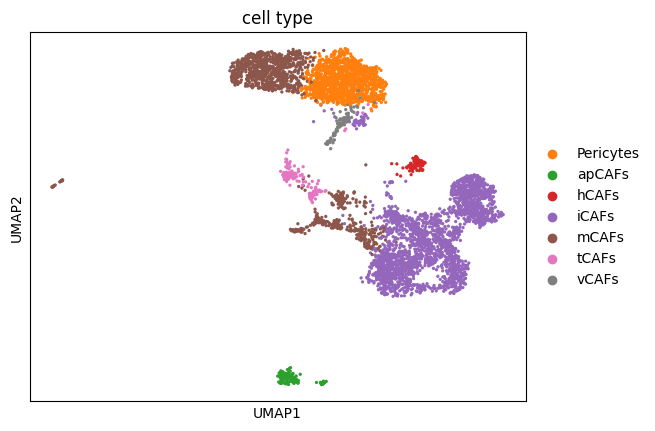

In [40]:
fdata3=fdata2[fdata2.obs['cell type'].isin(['iCAFs','mCAFs','apCAFs','Pericytes','tCAFs','vCAFs','hCAFs' ])].copy()
sc.pl.umap(fdata3,color='cell type')

In [41]:
fdata3.write('fibro_reannot_subset03.h5ad', compression = 'gzip')

In [42]:
fdata3=fdata3.raw.to_adata()


In [43]:
fdata3

AnnData object with n_obs × n_vars = 5365 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFe

# Repeat everything from the start to clean up the fibroblast clusters (3nd iteration)

In [44]:
sc.tl.umap(fdata3)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


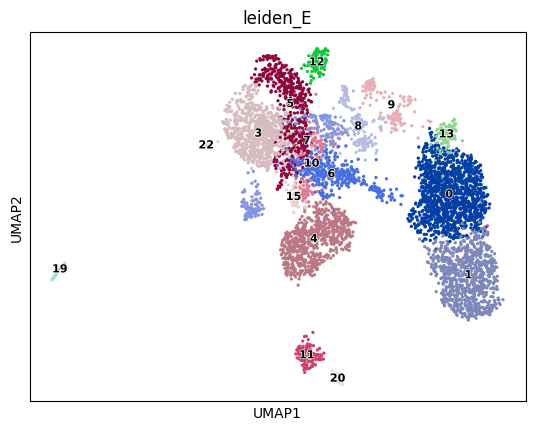

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


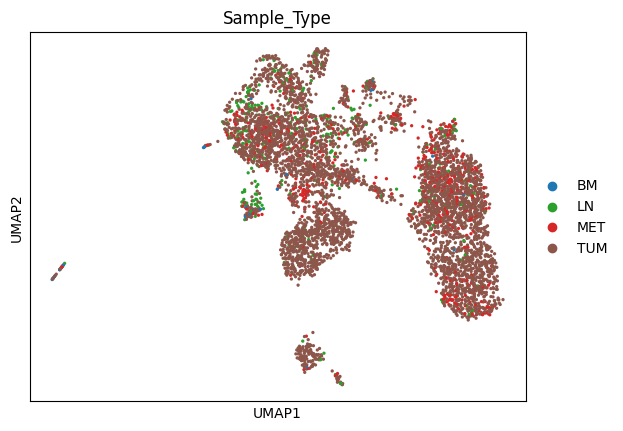

In [45]:
sc.pl.umap(fdata3, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata3, color=['Sample_Type'])

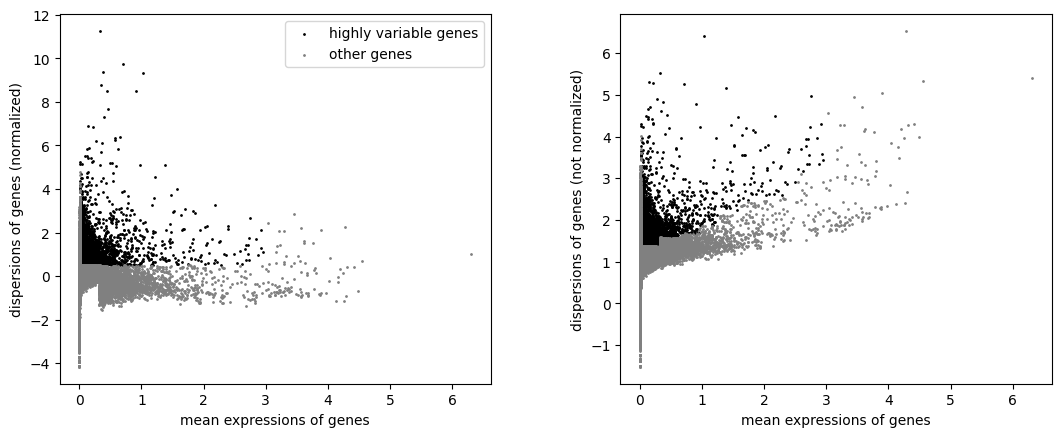

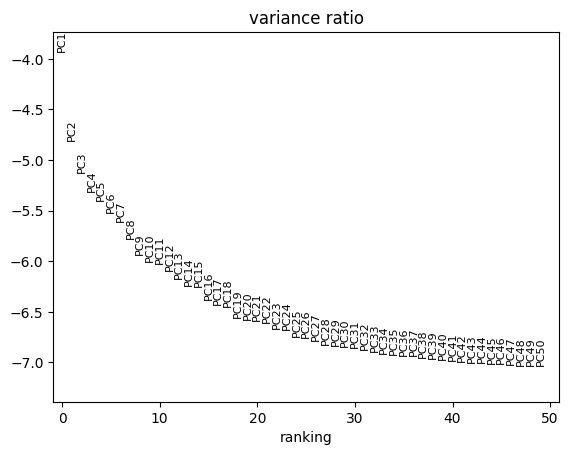

2023-08-15 16:47:10,750 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-15 16:47:14,307 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-15 16:47:14,344 - harmonypy - INFO - Iteration 1 of 10
2023-08-15 16:47:15,792 - harmonypy - INFO - Iteration 2 of 10
2023-08-15 16:47:17,378 - harmonypy - INFO - Iteration 3 of 10
2023-08-15 16:47:19,038 - harmonypy - INFO - Iteration 4 of 10
2023-08-15 16:47:21,170 - harmonypy - INFO - Iteration 5 of 10
2023-08-15 16:47:22,656 - harmonypy - INFO - Iteration 6 of 10
2023-08-15 16:47:23,746 - harmonypy - INFO - Iteration 7 of 10
2023-08-15 16:47:24,524 - harmonypy - INFO - Iteration 8 of 10
2023-08-15 16:47:25,286 - harmonypy - INFO - Iteration 9 of 10
2023-08-15 16:47:25,936 - harmonypy - INFO - Iteration 10 of 10
2023-08-15 16:47:26,575 - harmonypy - INFO - Stopped before convergence


In [46]:
try:
    fdata3.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata3, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata3)
fdata3.raw = fdata3
fdata3 = fdata3[:, fdata3.var.highly_variable]
sc.pp.regress_out(fdata3, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata3, max_value=10)
sc.tl.pca(fdata3, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata3, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata3, key="Sample_ID")
sc.pp.neighbors(fdata3,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata3, min_dist = 0.3)

In [47]:
fdata3.write('fibroblasts_reannot_subset03_postscale.h5ad')

In [48]:
#using numpy

np.max(fdata3.X)

10.0

In [49]:
np.min(fdata3.X)

-4.86482

In [5]:
#fdata3 = sc.read_h5ad('fibro_subset03.h5ad')###after re-annotation

In [50]:
fdata3

AnnData object with n_obs × n_vars = 5365 × 3826
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


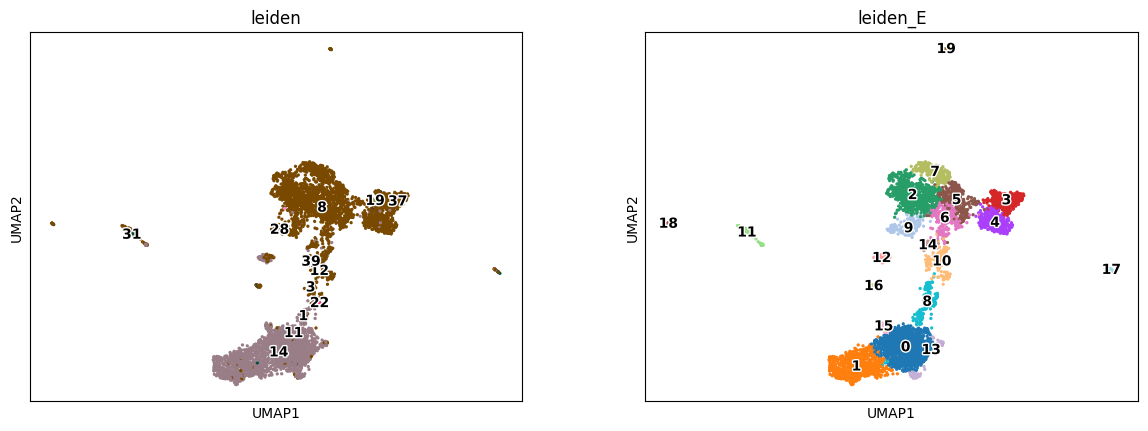

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


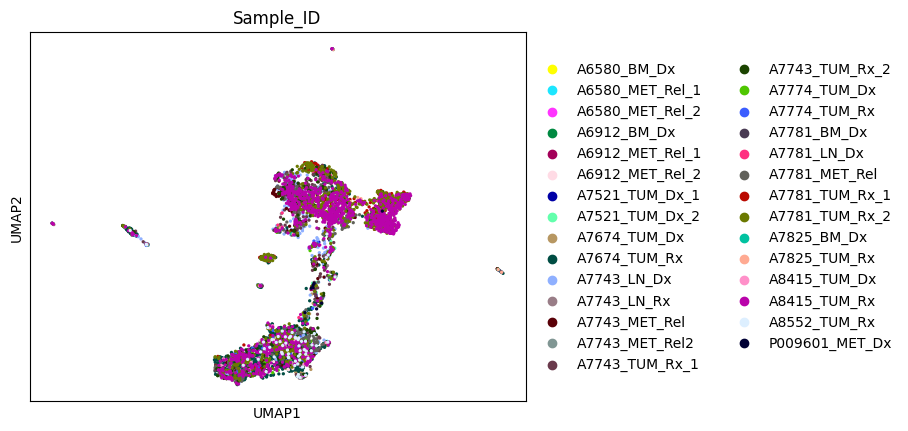

In [51]:
sc.tl.leiden(fdata3, key_added = "leiden_E")
sc.pl.umap(fdata3, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata3, color=['Sample_ID'])

In [52]:
fdata3.write('fibro_reannot_subset03.h5ad')

In [53]:
sc.tl.rank_genes_groups(fdata3,groupby='leiden_E', method='wilcoxon')

In [54]:
sc.tl.dendrogram(fdata3,groupby='leiden_E')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


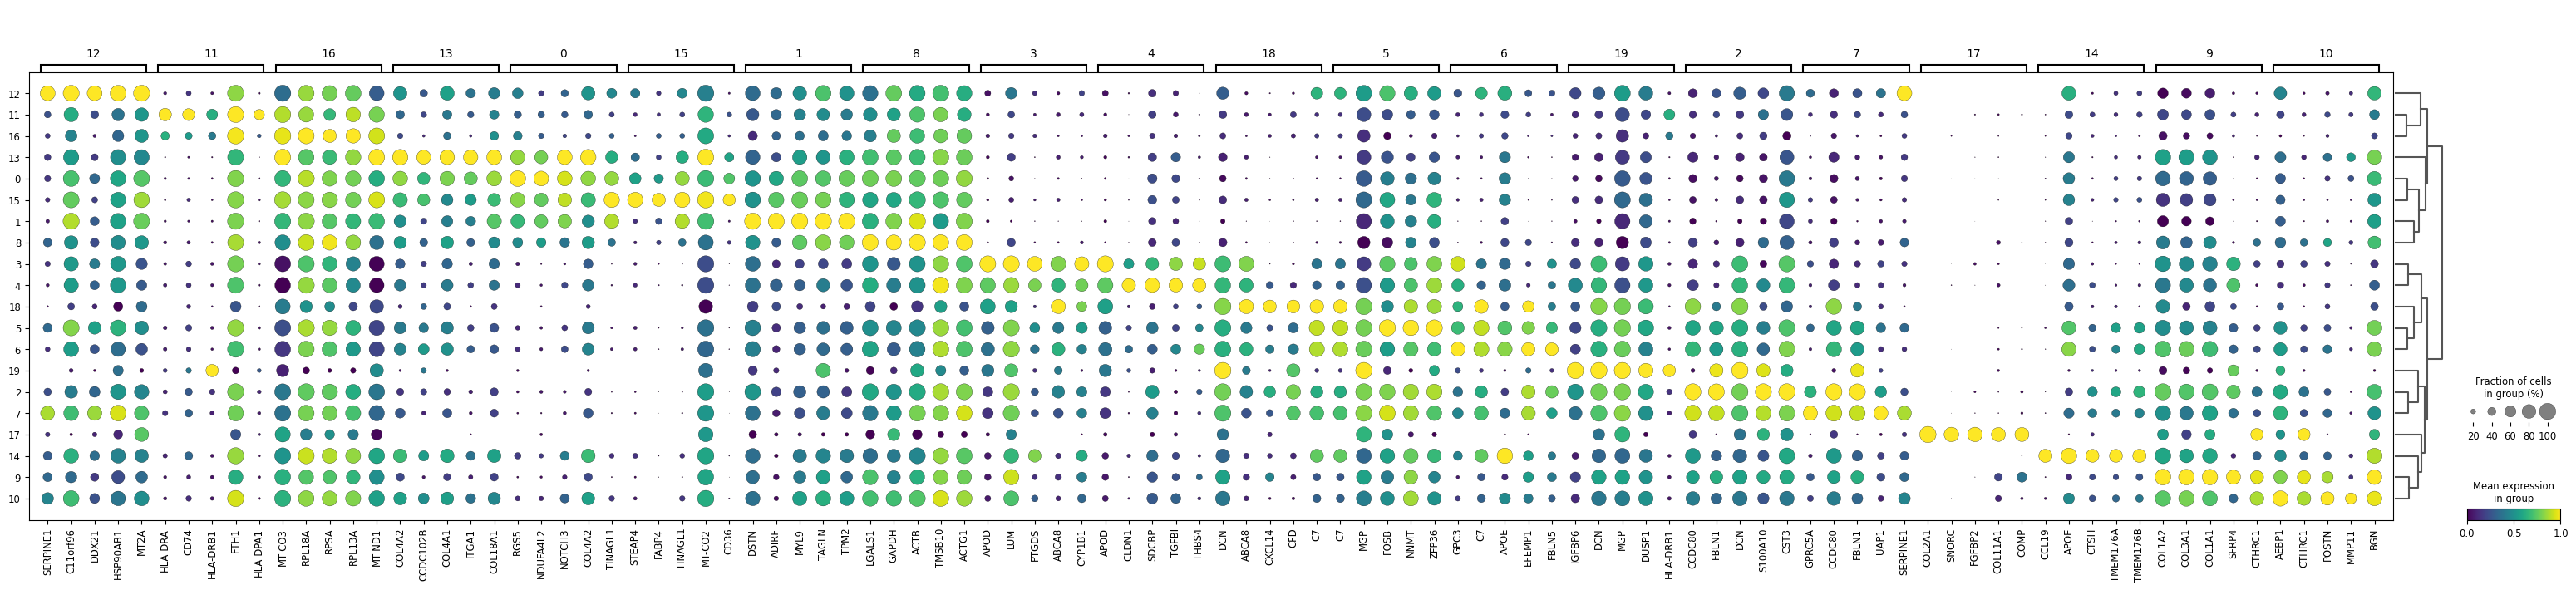

In [55]:
sc.pl.rank_genes_groups_dotplot(fdata3,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


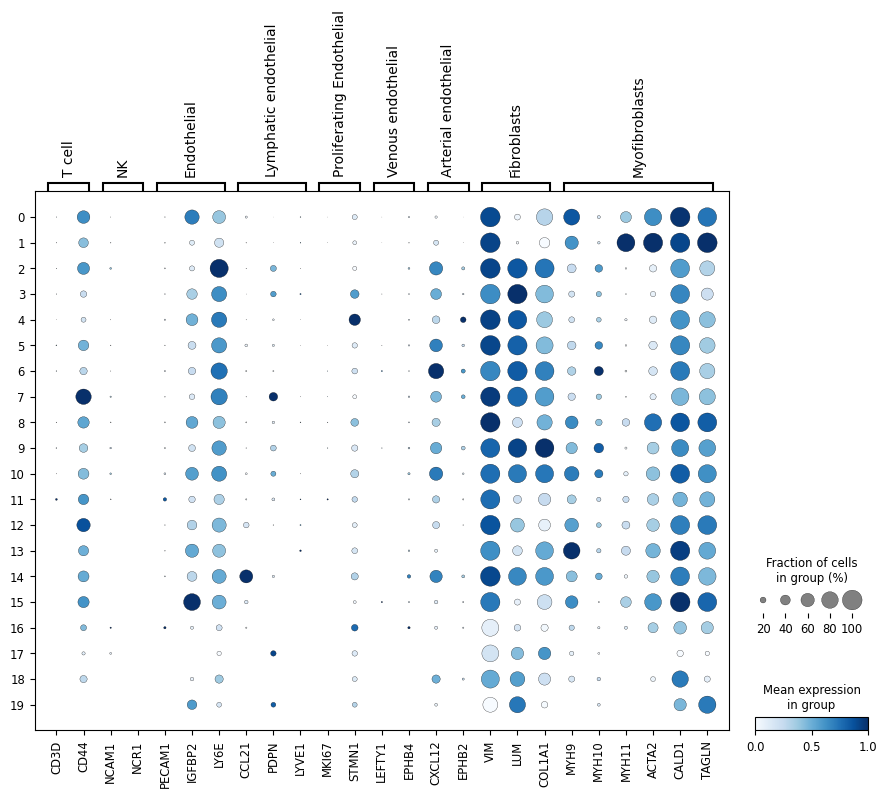

In [56]:
sc.pl.dotplot(fdata3, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [57]:
pd.DataFrame(fdata3.uns['rank_genes_groups']['names']).head(10)

0      1        2       3       4       5        6         7   
0      RGS5   DSTN   CCDC80    APOD    APOD      C7     GPC3    GPRC5A  \
1  NDUFA4L2  ADIRF    FBLN1     LUM   CLDN1     MGP       C7    CCDC80   
2    NOTCH3   MYL9      DCN   PTGDS   SDCBP    FOSB     APOE     FBLN1   
3    COL4A2  TAGLN  S100A10   ABCA8   TGFBI    NNMT   EFEMP1      UAP1   
4   TINAGL1   TPM2     CST3  CYP1B1   THBS4   ZFP36    FBLN5  SERPINE1   
5     MEF2C  MYH11      CFD    GPC3     OGN    APOE      OGN      EMP1   
6   COL18A1  ACTA2       C3     CFH  MYL12B    CCL2      MGP        C3   
7      MCAM   BCAM    FBLN2     GSN    ELOB    JUNB  RARRES2     VEGFA   
8     ITGA1   SOD3   IGFBP6   SCN7A   MEOX2  EFEMP1    ABCA8     MEDAG   
9      CD36   MYL6      GSN   CDH19  SBSPON  DNAJA1   CXCL12      UGDH   

         8       9      10        11        12        13        14       15   
0   LGALS1  COL1A2   AEBP1   HLA-DRA  SERPINE1    COL4A2     CCL19   STEAP4  \
1    GAPDH  COL3A1  CTHRC1      CD74  C11orf96  CCDC102B      APOE    FABP4   
2     ACTB  COL1A1   POSTN  HLA-DRB1     DDX21    COL4A1      CTSH  TINAGL1   
3   TMSB10   SFRP4   MMP11      FTH1  HSP90AB1     ITGA1  TMEM176A   MT-CO2   
4    ACTG1  CTHRC1     BGN  HLA-DPA1      MT2A   COL18A1  TMEM176B     CD36   
5     MYL6     LUM  COL3A1    LAPTM5      LDHA      THY1     CCL21   IGFBP2   
6  S100A11   SPARC    VCAN       B2M       NCL    MT-CO3      RBP5   MT-CO1   
7     TPM1    VCAN     FAP     RPS3A    TM4SF1   MT-ATP6    COL6A3   MT-ND2   
8    RPL27   SFRP2   SULF1    MT-CO3       RAN      UACA     PTGDS  MT-ATP6   
9    RPL35  COL8A1     FTL       LYZ      EMP1    MT-CO2   RARRES2     MT1M   

       16       17      18        19  
0  MT-CO3   COL2A1     DCN    IGFBP6  
1  RPL18A    SNORC   ABCA8       DCN  
2    RPSA   FGFBP2  CXCL14       MGP  
3  RPL13A  COL11A1     CFD     DUSP1  
4  MT-ND1     COMP      C7  HLA-DRB1  
5    FTH1   COL9A3  CCDC80   ZFP36L1  
6    RPS2   COL9A2    APOD     CYR61  
7    DLK1   COL9A1   ADH1B     ITM2B  
8    TPT1     RBP4     GSN     FBLN1  
9     LYZ    S100B     MGP      IL32

In [84]:
#14 - mural cells over myofibroblasts since only mural cell markers highly expressed and not fibroblasts
#1 - Can't find a particular subset of 1 - just it being fibroblasts - no cancer enriched markers either
#13 - Very small subset - could be reticular fibroblasts if further literature confirms MGP is a marker
fibroannot3= {
    '0':'Pericytes',
    '1':'vCAFs',
    '2':'iCAFs',
    '3':'iCAFs',
    '4':'iCAFs',
    '5':'iCAFs',
    '6':'iCAFs',
    '7':'iCAFs',
    '8':'tCAFs',
    '9':'mCAFs',
    '10':'mCAFs',
    '11':'apCAFs',
    '12':'Ambiguous',
    '13':'mCAFs',
    '14':'rCAFs',
    '15':'Ambiguous',
    '16':'Ambiguous',
    '17':'Ambiguous',
    '18':'Ambiguous',
    '19':'Ambiguous',


}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata3.obs['cell type'] = fdata3.obs['leiden_E'].map(fibroannot3).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


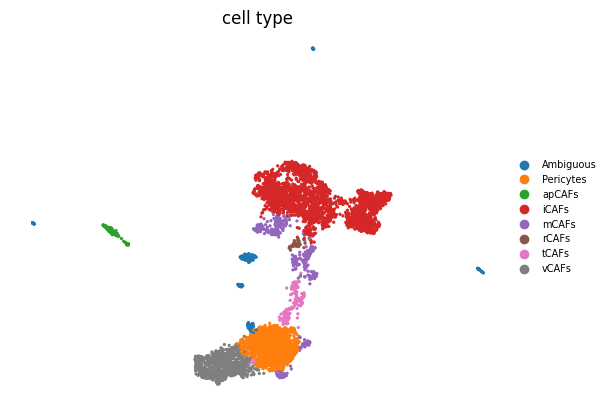

In [85]:
sc.pl.umap(fdata3, color='cell type',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


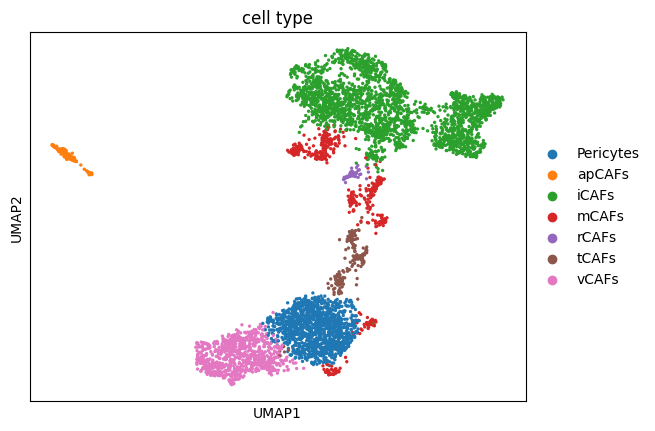

In [91]:
fdata4=fdata3[fdata3.obs['cell type'].isin(['tCAFs','rCAFs','mCAFs','iCAFs','apCAFs','Pericytes','vCAFs'])].copy()
sc.pl.umap(fdata4,color='cell type')

In [87]:
fdata4.write('fibro_reannot_subset04.h5ad', compression = 'gzip')

In [88]:
#Just running to check 
sc.tl.umap(fdata4)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


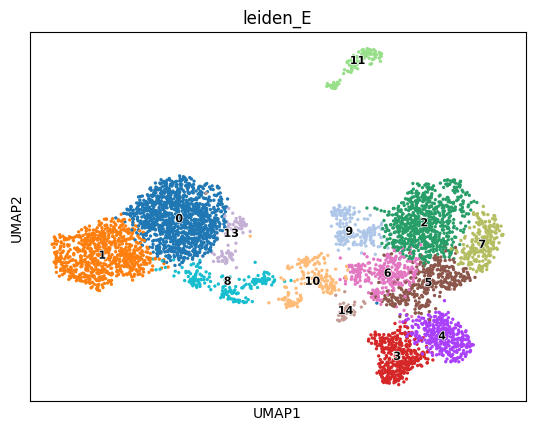

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


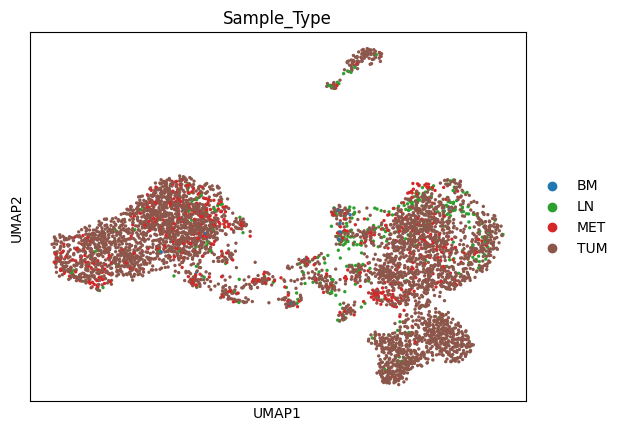

In [89]:
sc.pl.umap(fdata4, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata4, color=['Sample_Type'])

In [68]:
import tools

In [92]:
tools.combine_two_categories(fdata4,A='Sample_Type', B='cell type')

In [93]:
fdata4.obs

orig.ident  nCount_RNA   
AGTAGTCAGATCCCAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1         842  \
CGGAGCTCACAGACAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1         786   
CTAACTTCAAAGGCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1         874   
GCATGCGGTTTCCACC-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1        1141   
GGACAGATCCGCGGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1         707   
...                                                       ...         ...   
ATCTCTAGTCAGGTGA-1                             P009601_MET_Dx       21828   
ATTTCTGAGTCATCCA-1                             P009601_MET_Dx       39463   
GACCGTGAGACCGTTT-1                             P009601_MET_Dx        4774   
TGGAGAGAGCGTGAAC-1                             P009601_MET_Dx        6094   
TTGAGTGCACCGCTAG-1                             P009601_MET_Dx        4363   

                                              nFeature_RNA  scrublet_score   
AGTAGTCAGATCCCAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1           512        0.055513  \
CGGAGCTCACAGACAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1           489        0.049227   
CTAACTTCAAAGGCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1           544        0.068702   
GCATGCGGTTTCCACC-1_1_1_1_1_1_1_1_1_1_1_1_1_1           673        0.064265   
GGACAGATCCGCGGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1           468        0.056257   
...                                                    ...             ...   
ATCTCTAGTCAGGTGA-1                                    4684        0.047859   
ATTTCTGAGTCATCCA-1                                    5510        0.060649   
GACCGTGAGACCGTTT-1                                    1660        0.026052   
TGGAGAGAGCGTGAAC-1                                    1647        0.080725   
TTGAGTGCACCGCTAG-1                                    1512        0.089005   

                                              scrublet_classification  CMO301   
AGTAGTCAGATCCCAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN  \
CGGAGCTCACAGACAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
CTAACTTCAAAGGCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
GCATGCGGTTTCCACC-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
GGACAGATCCGCGGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
...                                                               ...     ...   
ATCTCTAGTCAGGTGA-1                                              False    18.0   
ATTTCTGAGTCATCCA-1                                              False     3.0   
GACCGTGAGACCGTTT-1                                              False     1.0   
TGGAGAGAGCGTGAAC-1                                              False     0.0   
TTGAGTGCACCGCTAG-1                                              False     0.0   

                                              CMO302  CMO303  CMO304  CMO305   
AGTAGTCAGATCCCAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN     NaN  \
CGGAGCTCACAGACAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN     NaN   
CTAACTTCAAAGGCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN     NaN   
GCATGCGGTTTCCACC-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN     NaN   
GGACAGATCCGCGGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN     NaN   
...                                              ...     ...     ...     ...   
ATCTCTAGTCAGGTGA-1                               4.0   620.0    44.0    11.0   
ATTTCTGAGTCATCCA-1                               5.0  3517.0   390.0     5.0   
GACCGTGAGACCGTTT-1                              11.0  9557.0    68.0     8.0   
TGGAGAGAGCGTGAAC-1                               9.0  3817.0   130.0    20.0   
TTGAGTGCACCGCTAG-1                              16.0  4495.0   110.0    17.0   

                                              ...  TCell_Signature   
AGTAGTCAGATCCCAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1  ...        -0.764980  \
CGGAGCTCACAGACAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1  ...        -0.650710   
CTAACTTCAAAGGCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1 

In [94]:
fdata4.obs.to_csv('fibroblastscelltypes_reannot_label.csv')

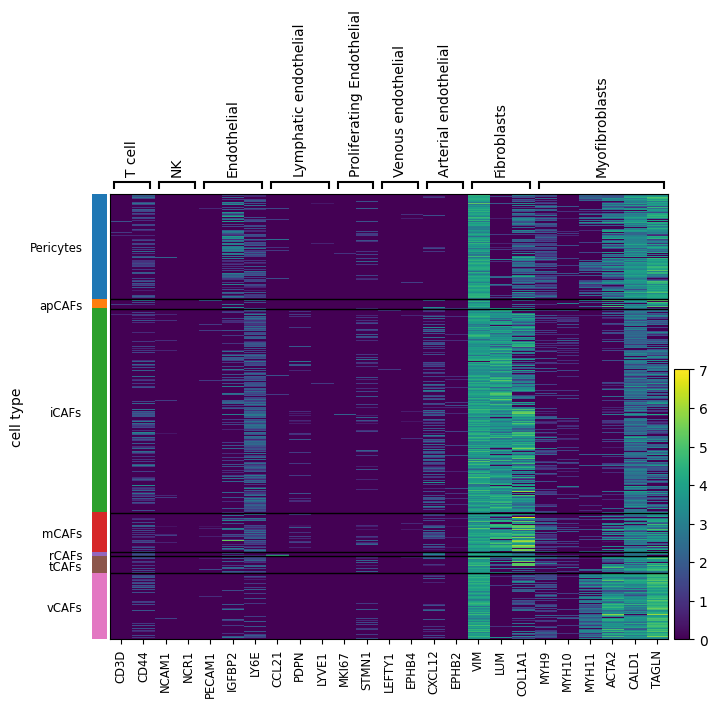

In [95]:
sc.pl.heatmap(fdata4,cellmarker_dict, groupby='cell type')

In [6]:
#clusters defined by this paper https://www.nature.com/articles/s41467-023-39762-1 

fibroblast_dict={'mCAF':['MMP11','POSTN','COL1A1','COMP','COL10A1','COL11A1'],
'iCAF':['CFD','PLA2G2A','APOD','PI16','CXCL14','PRG4'], 
'vCAF':['MYH11','RERGL','ADIRF','ACTA2','BCAM','MCAM'],
'Pericyte':['MCAM','RGS5','NDUFA4L2','COL4A1','HIGD1B','COX4I2','COL4A2'],
'tCAF':['ENO1','BNIP3','GAPDH','PGK1','NDRG1','TMEM158'],
'hsp tCAF':['HSPH1','VEGFA','CCNL1','VMP1','SAT1'],
'ifnCAF':['CCL5','CXCL11','CXCL10','CXCL9','CCL19','CST1'],
'apCAF':['CXCR4','HLA-DRB1','HLA-DRA','CD74','IGLC2','IGKC'],
'rCAF':['CCL21','IGFBP5','CCL2','C2orf40','APOE'],
'dCAF':['STMN1','PTTG1','H2AFZ','CENPF','MKI67','TOP2A']    }

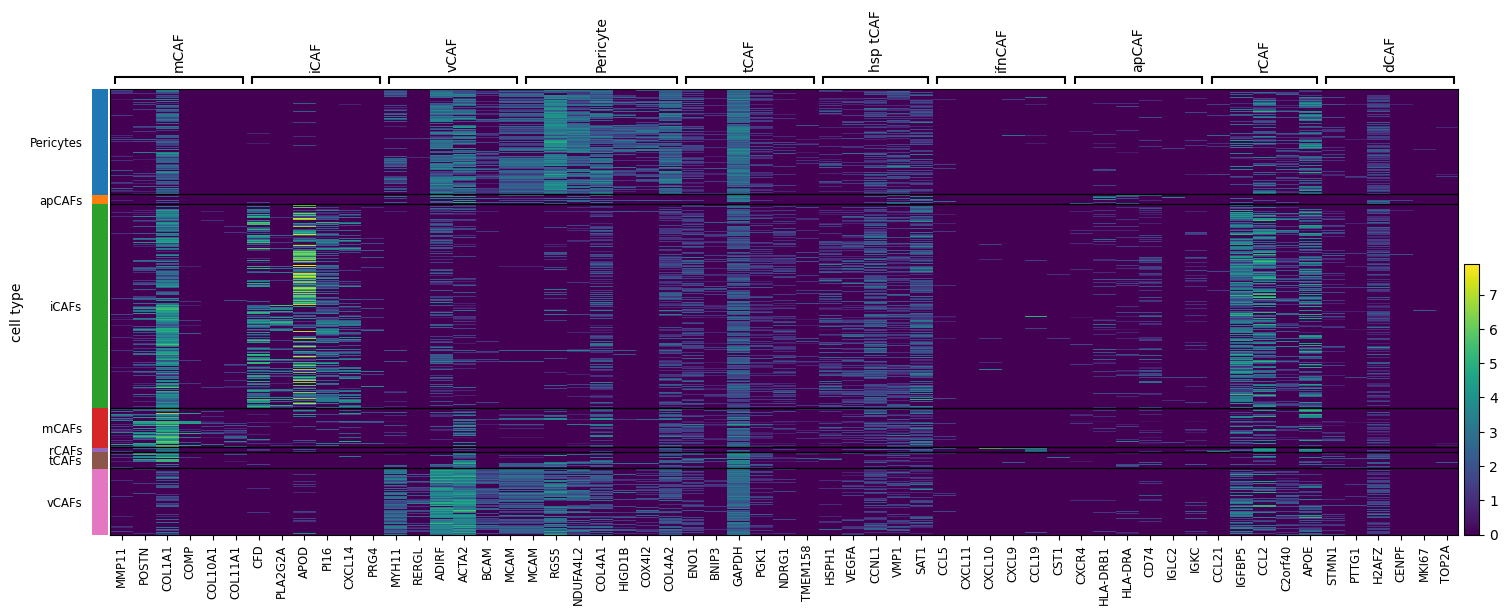

In [97]:
sc.pl.heatmap(fdata4,fibroblast_dict, groupby='cell type',show_gene_labels=bool)

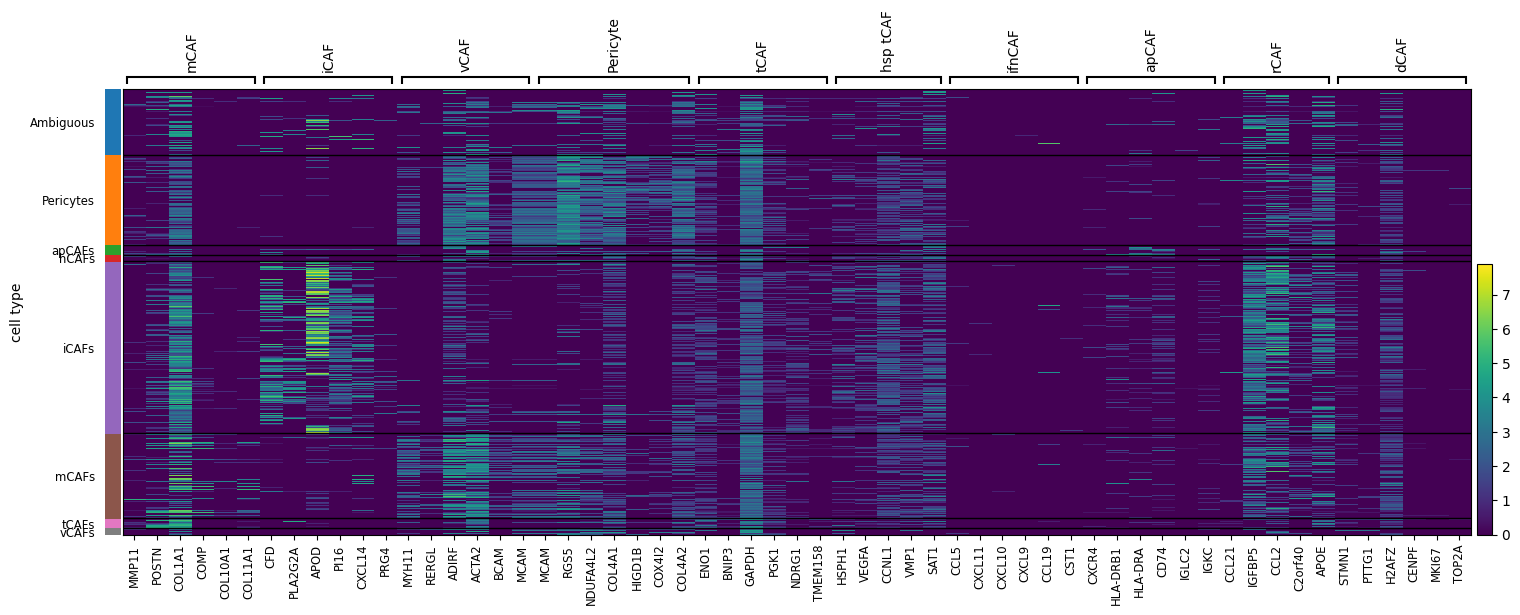

In [98]:
sc.pl.heatmap(fdata2,fibroblast_dict, groupby='cell type',show_gene_labels=bool)

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [101]:

# load dataset if not already loaded

# view dataset
print(fdata4)

AnnData object with n_obs × n_vars = 5149 × 3826
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

In [102]:
fdata4.obs.Treatment_Stage.cat.categories

Index(['Dx', 'Rel', 'Rel2', 'Rx'], dtype='object')

In [117]:
fdata4.obs['cell type'].value_counts()

cell type
iCAFs        2353
Pericytes    1220
vCAFs         764
mCAFs         453
tCAFs         196
apCAFs        113
rCAFs          50
Name: count, dtype: int64

In [133]:
tools.combine_two_categories(fdata4,A='Treatment_Stage', B='cell type')

In [135]:
fdata4.obs['Treatment_Stage_cell type'].value_counts()

Treatment_Stage_cell type
Rx_iCAFs          1961
Rx_Pericytes       970
Rx_vCAFs           654
Rx_mCAFs           251
Rel_iCAFs          205
Dx_iCAFs           187
Rel_Pericytes      174
Dx_mCAFs           139
Rx_tCAFs           108
Rx_apCAFs           93
Rel_vCAFs           79
Dx_Pericytes        65
Rel_mCAFs           60
Dx_tCAFs            60
Dx_vCAFs            29
Rx_rCAFs            25
Rel_tCAFs           23
Dx_rCAFs            19
Dx_apCAFs           13
Rel2_Pericytes      11
Rel_apCAFs           7
Rel_rCAFs            6
Rel2_tCAFs           5
Rel2_mCAFs           3
Rel2_vCAFs           2
Name: count, dtype: int64

In [153]:
total_fibro=(len(fdata4.obs['cell type']))


In [154]:
print(total_fibro)

5149


In [168]:
print(len(fdata4.obs['Patient']))

5149


In [ ]:
fdata4.obs.celltype_tx_stage=(fdata4.obs.groupby('cell type')['Treatment_Stage'])
fdata4['Subtype % Tx stage'] = fdata4['celltype_tx_stage'] / total_fibro

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fdata4_obs = pd.read_csv("/Users/nicoleanngunn/Documents/GitHub/Nicole_notebooks/fibroblastscelltypes_reannot_label.csv")

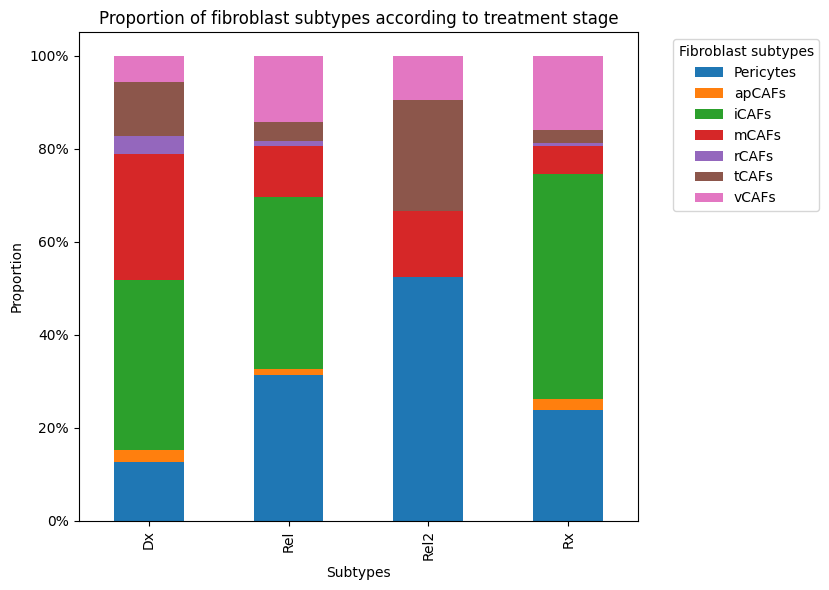

In [2]:
# Calculate the proportions of each cell type within each sample
proportions = fdata4_obs.groupby(['Treatment_Stage', 'cell type']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Create stacked percentage bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Proportion')
ax.set_xlabel('Subtypes')
ax.set_title('Proportion of fibroblast subtypes according to treatment stage')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f'{val:.0%}'))

legend = ax.legend(title='Fibroblast subtypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()



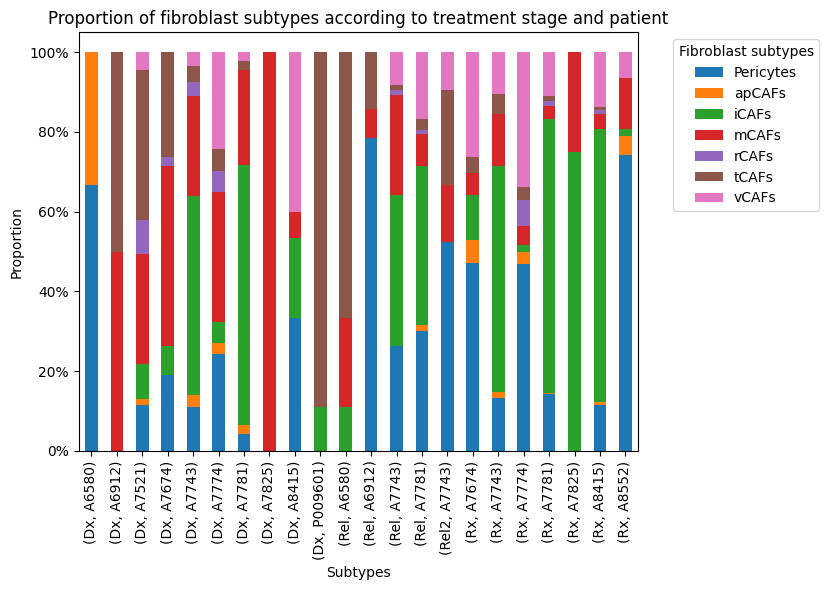

In [4]:
# Per patient
# Calculate the proportions of each cell type within each sample
proportions = fdata4_obs.groupby(['Treatment_Stage','Patient','cell type']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Create stacked percentage bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Proportion')
ax.set_xlabel('Subtypes')
ax.set_title('Proportion of fibroblast subtypes according to treatment stage and patient')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f'{val:.0%}'))

legend = ax.legend(title='Fibroblast subtypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()


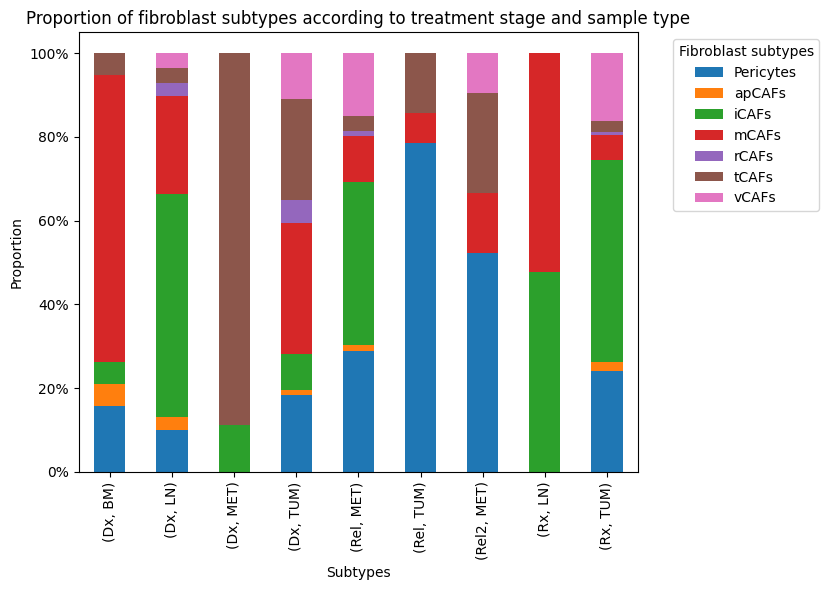

In [3]:
# Per sample type
# Calculate the proportions of each cell type within each sample
proportions = fdata4_obs.groupby(['Treatment_Stage','Sample_Type','cell type']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Create stacked percentage bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Proportion')
ax.set_xlabel('Subtypes')
ax.set_title('Proportion of fibroblast subtypes according to treatment stage and sample type')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f'{val:.0%}'))

legend = ax.legend(title='Fibroblast subtypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()

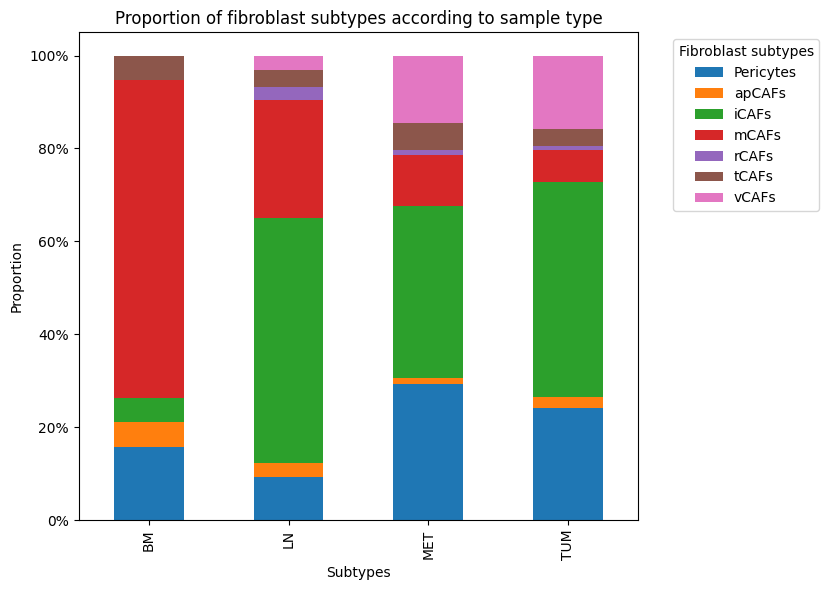

In [5]:
# Per sample type only
# Calculate the proportions of each cell type within each sample
proportions = fdata4_obs.groupby(['Sample_Type','cell type']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Create stacked percentage bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Proportion')
ax.set_xlabel('Subtypes')
ax.set_title('Proportion of fibroblast subtypes according to sample type')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f'{val:.0%}'))

legend = ax.legend(title='Fibroblast subtypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()

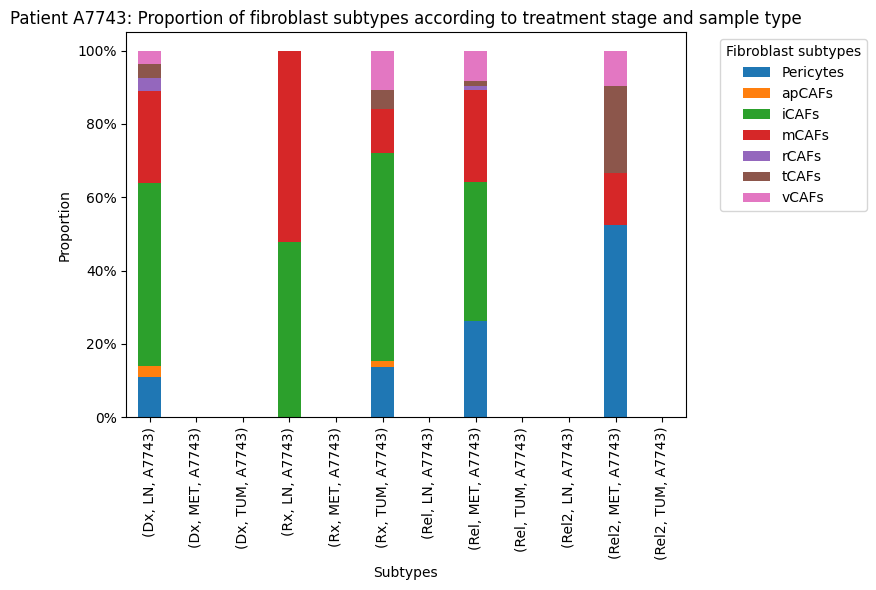

In [7]:
# Calculate the proportions of each cell type within each sample
fdata4_obs["Treatment_Stage"] = fdata4_obs["Treatment_Stage"].astype("category")
fdata4_obs["Treatment_Stage"] = fdata4_obs["Treatment_Stage"].cat.reorder_categories(["Dx", "Rx", "Rel", "Rel2"])
proportions = fdata4_obs[fdata4_obs['Patient'] == "A7743"].groupby(['Treatment_Stage', 'Sample_Type', 'Patient','cell type']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Create stacked percentage bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Proportion')
ax.set_xlabel('Subtypes')
ax.set_title('Patient A7743: Proportion of fibroblast subtypes according to treatment stage and sample type')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f'{val:.0%}'))

legend = ax.legend(title='Fibroblast subtypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()

Changing the colours of cell types on the last UMAP for consistency with the all cell types UMAP

In [2]:
fdata4 = sc.read_h5ad("/Users/nicoleanngunn/Documents/GitHub/Nicole_notebooks/fibro_reannot_subset04.h5ad")

In [3]:
fdata4

AnnData object with n_obs × n_vars = 5149 × 3826
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

In [6]:
####color celltype_class2
celltype_class2_col={
 
 'Pericytes':"#67000d",
 'apCAFs':"#a50f15",
 'iCAFs':"#cb181d",
 'mCAFs':"#ef3b2c",
 'rCAFs':"#fb6a4a",
 'tCAFs':"#fc9272",
 'vCAFs':"#fcbba1", 
 }
 # add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
#fdata4.obs['cell type'] = fdata4.obs['leiden_E'].map(celltype_class2_col).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


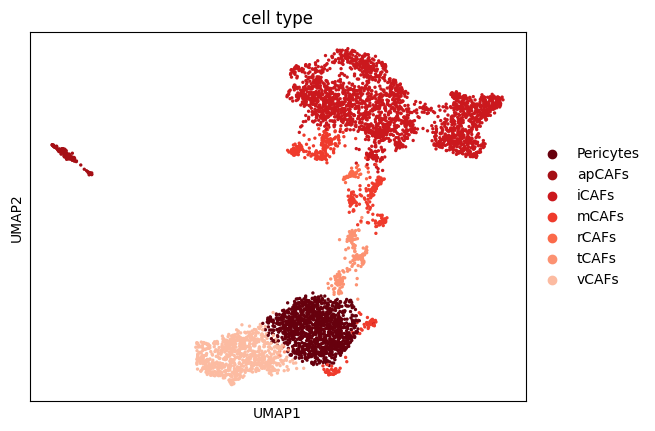

In [7]:
sc.pl.umap(fdata4, color='cell type', palette=celltype_class2_col)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


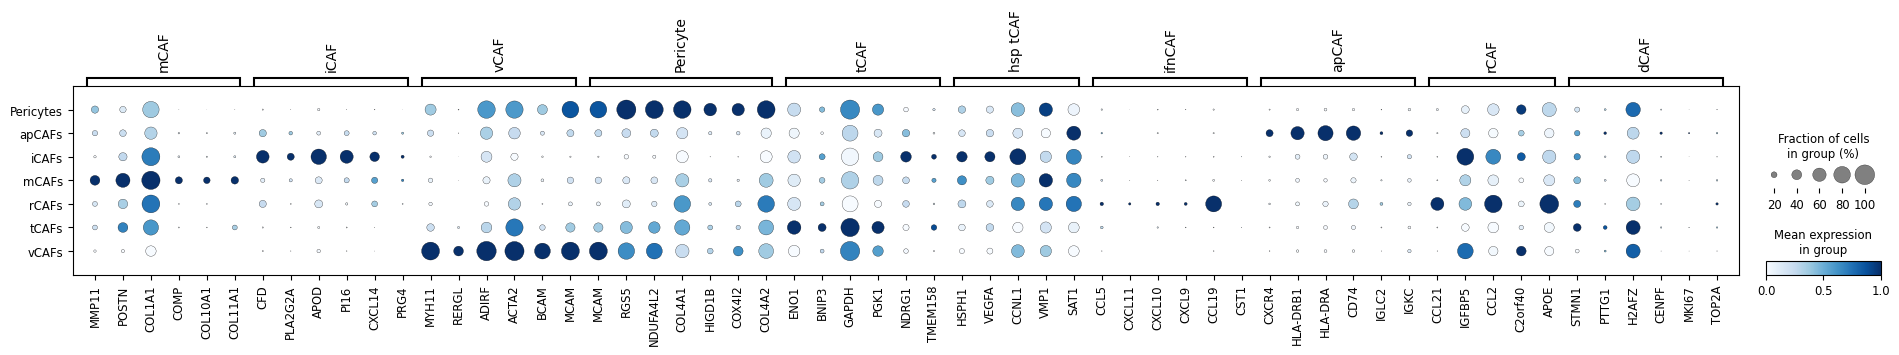

In [7]:
sc.pl.dotplot(fdata4, fibroblast_dict, groupby='cell type', 
              standard_scale='var',color_map='Blues')

In [4]:
fdata4

AnnData object with n_obs × n_vars = 5149 × 3826
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea